In [8]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile, join
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from matplotlib import patches
from matplotlib.collections import PatchCollection
#import matplotlib
from PIL import Image, ImageDraw
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import pyplot
from skimage.color import rgb2gray, gray2rgb
from skimage.filters import threshold_otsu
from shapely.geometry.polygon import Polygon as Polygon_shapley
# from multiprocessing import Pool
import multiprocessing
import time
import random
import pickle
import png
from scipy.spatial import ConvexHull
import bbox_visualizer as bbv
import operator
import fileinput
import re
sys.path.insert(0, os.path.dirname(os.path.abspath('.'))) # to make imports relative to project root work

# Check Cell Images Malaria Dataset

Get data from https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets save it in data

In [9]:
path_uninfected = '../data/cell_images/patientid_cellmapping_uninfected.csv'
path_parasitized = '../data/cell_images/patientid_cellmapping_parasitized.csv'
# Read in the file
with open(path_uninfected, 'r') as file :
    filedata = file.read()

# Replace the target string
filedata = filedata.replace('[|]', '')

# Write the file out again
with open(path_uninfected, 'w') as file:
    file.write(filedata)


In [10]:
#read and transform data
uninfected = pd.read_csv('../data/cell_images/patientid_cellmapping_uninfected.csv', header = None)
uninfected = uninfected.set_index(0)
uninfected['imgs'] = uninfected.values.tolist()
uninfected['imgs'] = uninfected['imgs'].apply(lambda mylist: [x for x in mylist if pd.isnull(x) == False])
uninfected_df = pd.DataFrame(uninfected['imgs'], index =uninfected.index)
parasitized = pd.read_csv('../data/cell_images/patientid_cellmapping_parasitized.csv', header = None)
parasitized = parasitized.set_index(0)
parasitized['imgs'] = parasitized.values.tolist()
parasitized['imgs'] = parasitized['imgs'].apply(lambda mylist: [x for x in mylist if pd.isnull(x) == False])
parasitized_df = pd.DataFrame(parasitized['imgs'], index =parasitized.index)

In [11]:
# get additional data
uninfected_df['len_imgs'] = uninfected_df['imgs'].apply(lambda x: len(x))
parasitized_df['len_imgs'] = parasitized_df['imgs'].apply(lambda x: len(x))
uninfected_df

imgs  len_imgs
0                                                                        
C100P61ThinF  [['C100P61ThinF_IMG_20150918_144104_cell_128.p...        68
C101P62ThinF  [['C101P62ThinF_IMG_20150918_151006_cell_17.pn...        71
C102P63ThinF  [['C102P63ThinF_IMG_20150918_161508_cell_101.p...        68
C103P64ThinF  [['C103P64ThinF_IMG_20150918_164250_cell_121.p...        68
C104P65ThinF  [['C104P65ThinF_IMG_20150918_170850_cell_140.p...        72
...                                                         ...       ...
C95P56ThinF   [['C95P56ThinF_IMG_20150821_171242_cell_21.png...        68
C96P57ThinF   [['C96P57ThinF_IMG_20150824_105213_cell_119.pn...        67
C97P58ThinF   [['C97P58ThinF_IMG_20150917_145555_cell_103.pn...        65
C98P59ThinF   [['C98P59ThinF_IMG_20150917_153030_cell_120.pn...        69
C99P60ThinF   [['C99P60ThinF_IMG_20150918_140900_cell_24.png...        68

[201 rows x 2 columns]

In [12]:
parasitized_df

imgs  len_imgs
0                                                                        
C100P61ThinF  [['C100P61ThinF_IMG_20150918_144104_cell_162.p...        57
C101P62ThinF  [['C101P62ThinF_IMG_20150918_151006_cell_61.pn...       314
C102P63ThinF  [['C102P63ThinF_IMG_20150918_161508_cell_190.p...        35
C103P64ThinF  [['C103P64ThinF_IMG_20150918_164250_cell_170.p...        39
C104P65ThinF  [['C104P65ThinF_IMG_20150918_170850_cell_204.p...        10
...                                                         ...       ...
C95P56ThinF   [['C95P56ThinF_IMG_20150821_171242_cell_100.pn...        24
C96P57ThinF   [['C96P57ThinF_IMG_20150824_105213_cell_207.pn...        19
C97P58ThinF   [['C97P58ThinF_IMG_20150917_145555_cell_165.pn...       245
C98P59ThinF   [['C98P59ThinF_IMG_20150917_153030_cell_156.pn...        39
C99P60ThinF   [['C99P60ThinF_IMG_20150918_140900_cell_100.pn...       564

[151 rows x 2 columns]

##### Patient Nr. 8 has two entries.


In [13]:
def get_patient_id(lst):
    for item in lst:
        try:
            return int(re.search('P[0-9]*', item).group(0)[1:])
        except Exception as e:
            print(e)

uninfected_df['patient_n'] = uninfected_df['imgs'].apply(lambda x: get_patient_id(x))
parasitized_df['patient_n'] = parasitized_df['imgs'].apply(lambda x: get_patient_id(x))

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' 

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' 

In [14]:
parasitized_df['patient_n'].duplicated().value_counts()

False    150
True       1
Name: patient_n, dtype: int64

In [15]:
parasitized_df[parasitized_df['patient_n'].duplicated() == True]

imgs  \
0                                                                             
C47P8thin_Original_Motic  [['C47P8thin_Original_Motic_IMG_20150714_09351...   

                          len_imgs  patient_n  
0                                              
C47P8thin_Original_Motic         8          8

In [16]:
parasitized_df[parasitized_df['patient_n'] == 8]

imgs  \
0                                                                                 
C47P8thinOriginalOlympusCX21  [['C47P8thinOriginalOlympusCX21_IMG_20150717_1...   
C47P8thin_Original_Motic      [['C47P8thin_Original_Motic_IMG_20150714_09351...   

                              len_imgs  patient_n  
0                                                  
C47P8thinOriginalOlympusCX21         2          8  
C47P8thin_Original_Motic             8          8

In [17]:
uninfected_df[uninfected_df['patient_n'].isna()]

imgs  len_imgs  \
0                                                                              
C12NThinF        [['C12NThinF_IMG_20150614_124212_cell_111.png'...        68   
C13NThinF        [['C13NThinF_IMG_20150614_131318_cell_102.png'...        69   
C1_thinF         [['C1_thinF_IMG_20150604_104722_cell_115.png',...        70   
C201ThinF        [['C201ThinF_IMG_20150930_142848_cell_106.png'...        68   
C202ThinF        [['C202ThinF_IMG_20151015_151254_cell_118.png'...        65   
C203ThinF        [['C203ThinF_IMG_20151029_102123_cell_108.png'...        69   
C204ThinF        [['C204ThinF_IMG_20151029_110627_cell_102.png'...        67   
C205ThinF        [['C205ThinF_IMG_20151106_151514_cell_117.png'...        69   
C206ThinF        [['C206ThinF_IMG_20151029_140511_cell_112.png'...        71   
C207ThinF        [['C207ThinF_IMG_20151029_143711_cell_105.png'...        70   
C208ThinF        [['C208ThinF_IMG_20151029_151017_cell_107.png'...        69   
C209ThinF        [['C209ThinF_IMG_20151029_160721_cell_10.png',...        71   
C210ThinF        [['C210ThinF_IMG_20151029_162357_cell_107.png'...        68   
C211ThinF        [['C211ThinF_IMG_20151029_163959_cell_104.png'...        69   
C212ThinF        [['C212ThinF_IMG_20151106_105437_cell_132.png'...        68   
C213ThinF        [['C213ThinF_IMG_20151106_112252_cell_155.png'...        69   
C214ThinF        [['C214ThinF_IMG_20151106_114526_cell_13.png',...        67   
C215ThinF        [['C215ThinF_IMG_20151106_133012_cell_127.png'...        69   
C216ThinF        [['C216ThinF_IMG_20151106_134733_cell_105.png'...        68   
C217ThinF        [['C217ThinF_IMG_20151106_141135_cell_122.png'...        69   
C218ThinF        [['C218ThinF_IMG_20151106_143940_cell_145.png'...        69   
C219ThinF        [['C219ThinF_IMG_20151106_145856_cell_124.png'...        66   
C220ThinF        [['C220ThinF_IMG_20151106_153947_cell_108.png'...        68   
C221ThinF        [['C221ThinF_IMG_20151106_155857_cell_13.png',...        70   
C222ThinF        [['C222ThinF_IMG_20151115_150057_cell_104.png'...        69   
C223ThinF        [['C223ThinF_IMG_20151112_103809_cell_101.png'...        68   
C224ThinF        [['C224ThinF_IMG_20151112_111955_cell_105.png'...        67   
C225ThinF        [['C225ThinF_IMG_20151112_113735_cell_111.png'...        67   
C226ThinF        [['C226ThinF_IMG_20151112_131255_cell_141.png'...        68   
C227ThinF        [['C227ThinF_IMG_20151112_135158_cell_122.png'...        68   
C228ThinF        [['C228ThinF_IMG_20151112_142109_cell_100.png'...        66   
C229ThinF        [['C229ThinF_IMG_20151112_144147_cell_130.png'...        69   
C230ThinF        [['C230ThinF_IMG_20151112_150329_cell_138.png'...        68   
C231ThinF        [['C231ThinF_IMG_20151112_152234_cell_1.png', ...        70   
C232ThinF        [['C232ThinF_IMG_20151112_154211_cell_112.png'...        69   
C233ThinF        [['C233ThinF_IMG_20151112_160059_cell_114.png'...        68   
C234ThinF        [['C234ThinF_IMG_20151112_162759_cell_106.png'...        65   
C235ThinF        [['C235ThinF_IMG_20151112_164625_cell_119.png'...        68   
C236ThinF        [['C236ThinF_IMG_20151127_102115_cell_104.png'...        68   
C237ThinF        [['C237ThinF_IMG_20151127_104748_cell_110.png'...        68   
C238NThinF       [['C238NThinF_IMG_20151207_114038_cell_106.png...        70   
C239ThinF        [['C239ThinF_IMG_20151127_113008_cell_1.png', ...        69   
C240ThinF        [['C240ThinF_IMG_20151127_115223_cell_105.png'...        65   
C241NThinF       [['C241NThinF_IMG_20151207_124030_cell_129.png...        68   
C2NThinF         [['C2NThinF_IMG_20150604_114631_cell_141.png',...        69   
C3thin_original  [['C3thin_original_IMG_20150608_162835_cell_10...        69   
C4thin_original  [['C4thin_original_IMG_20150608_165540_cell_16...        67   
C5NThinF         [['C5NThinF_IMG_20150609_122006_cell_109.png',...        69   
C6NThinF         [['C6NThinF_IMG_20150609_121955_cell_104.png'

In [18]:
len(uninfected_df[uninfected_df['patient_n'].isna()])

50

In [19]:
len(parasitized_df[parasitized_df['patient_n'].isna()])

0

In [20]:
uninfected_df['len_imgs'].sum()

13779

In [21]:
parasitized_df['len_imgs'].sum()

13779

In [22]:
uninfected_df['len_imgs'].sum() + parasitized_df['len_imgs'].sum()

27558

# Check Bounding Boxex NIH

First download files from ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/NIH-NLM-ThinBloodSmearsPf/ to folder (see the terminal comand below) e.g.

NIH_NLM_ThinBloodSmears <br>
└-Point Set <br>
└-Polygon Set <br>
Notebooks <br>
└-IH_bounding_boxes.ipynb <br>

In the Terminal navigate to the folder you want your data in (**cd** then drag and drop the folder) then enter following:

wget -r -np ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/NIH-NLM-ThinBloodSmearsPf/

(you might need to install wget with **brew install wget** and if you do not have brew then install homebrew https://brew.sh/)


In [23]:
def get_txt(path):
    list_txt = []
    # Delimiter
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".txt"):
                txt_path = os.path.join(root, file)
                list_txt.append(txt_path)
    return list_txt


def txt_to_df(path):
    data_file_delimiter = ','
    df = pd.DataFrame(columns = [ 'Patient no - Cell no','cell', 'comment', 'annotation_type','Number of points', 'position', 'filename', 'txt_path', 'img_path'])
    root, file = os.path.split(path)
    filename, file_extension = os.path.splitext(file)
    txt_path = os.path.join(root, file)
    img_path = os.path.join(root.replace("GT", "Img"), filename +'.jpg')
    # Loop the data lines
    with open(txt_path, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()
        lines.pop(0)
        for l in lines:
            # Count the column count for the current line
            columns = l.split(data_file_delimiter)
            list_locations = [int(float(location)) for location in columns[5:]]
            zip_locations = list(zip(list_locations[::2], list_locations[1::2]))
            df = df.append( {'Patient no - Cell no': columns[0], 'cell': columns[1], 'comment': columns[2], 'annotation_type': columns[3], \
                'Number of points': columns[4], 'position': zip_locations, 'filename': filename, 'txt_path': txt_path, 'img_path': img_path}, ignore_index = True)
    return df

def collect_results(df_collected):
    """Uses apply_async's callback to setup up a separate Queue for each process"""
    global df
    df = df.append(df_collected)


In [24]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

def draw_points(img, cell, annotation, position, row, rows = 1, columns = 1, i = 1, point_size = 15):
    colour = (0,255,0) if cell == 'Uninfected' \
        else (255,0, 0) if cell == 'Parasitized' \
            else (128,0, 128) if cell == 'Platelet' \
                else (0, 0, 255) if cell == 'White_Blood_Cell' \
                    else (255,215,0)

    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(row['filename'])

    if annotation == 'Point':
        x = position[0][0] 
        y = position[0][1] 
        cv2.circle(img, position[0], 1, colour, point_size)
    
    elif annotation == 'Polygon':
        if len(position) < 3:
            print('row: ', row)
        if not len(position) < 3:
            poly = Polygon_shapley(position)
            x,y = poly.exterior.xy
            ax.plot(x, y, color=rgb_to_hex(colour), alpha=0.7,
                linewidth=3, solid_capstyle='round', zorder=2)


In [25]:
txt_list = get_txt('../data/NIH-NLM-ThinBloodSmearsPf')
print(len(txt_list))

965


**The following operation takes a while lean back and get a coffee**

In [26]:
df = pd.DataFrame(columns = [ 'Patient no - Cell no','cell', 'comment', 'annotation_type','Number of points', 'position', 'filename', 'txt_path', 'img_path'])
start_time = time.time()  

# Repeats the compute intensive operation on all available cores
pool = multiprocessing.Pool(processes = multiprocessing.cpu_count())
pool.map_async(txt_to_df, txt_list, callback = collect_results)
pool.close()
pool.join()

# Converts list of lists to a data frame
print(df.shape)
print("--- %s seconds ---" % (time.time() - start_time))

(196934, 9)
--- 148.2087540626526 seconds ---


In [27]:
df.reset_index(drop=True, inplace = True)
pickle_labels = open('../data/pickled/labels.pkl', 'wb') 
pickle.dump(df, pickle_labels)

In [28]:
df = pd.read_pickle('../data/pickled/labels.pkl')

In [29]:
df

Patient no - Cell no        cell     comment annotation_type  \
0                       3-1  Uninfected  No_comment         Polygon   
1                       3-2  Uninfected  No_comment         Polygon   
2                       3-3  Uninfected  No_comment         Polygon   
3                       3-4  Uninfected  No_comment         Polygon   
4                       3-5  Uninfected  No_comment         Polygon   
...                     ...         ...         ...             ...   
196929                5-200  Uninfected  No_Comment           Point   
196930                5-201  Uninfected  No_Comment           Point   
196931                5-202  Uninfected  No_Comment           Point   
196932                5-203  Uninfected  No_Comment           Point   
196933                5-204  Uninfected  No_Comment           Point   

       Number of points                                           position  \
0                    14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                    15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                    14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                    14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                    14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
...                 ...                                                ...   
196929                1                                      [(2080, 643)]   
196930                1                                      [(1790, 606)]   
196931                1                                      [(1757, 756)]   
196932                1                                      [(1860, 856)]   
196933                1                                      [(1623, 683)]   

                   filename  \
0       IMG_20150817_103139   
1       IMG_20150817_103139   
2       IMG_20150817_103139   
3       IMG_20150817_103139   
4       IMG_20150817_103139   
...                     ...   
196929  IMG_20151115_181859   
196930  IMG_20151115_181859   
196931  IMG_20151115_181859   
196932  IMG_20151115_181859   
196933  IMG_20151115_181859   

                                                 txt_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
...                                                   ...  
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  

[196934 rows x 9 columns]

In [30]:
# df = pd.read_csv(gt_path, sep = ',', header = 0, names= [ '?','cell', 'comment', 'annotation_type','??', 'y', 'x'])
df['cell'].value_counts()

Uninfected          188711
Parasitized           7952
White_Blood_Cell       271
Name: cell, dtype: int64

In [31]:
df_points = df[df['annotation_type'] == 'Point']
df_points.groupby(['filename']).count()['cell'].mean()

203.3375

In [32]:
# df['position_len'] = df['position'].apply(lambda x: len(x))
# short_polygon = df.loc[(df['annotation_type'] == 'Polygon') & (df['position_len'] < 3)] 
# short_polygon.to_csv('short_polygon.csv', index = False)

In [33]:
filename =  'IMG_20150621_112043' #'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
...                                                  ...  
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  

[209 rows x 9 columns]

In [34]:
df_file[df_file['position'].str.len() > 0]

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
...                                                  ...  
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  

[209 rows x 9 columns]

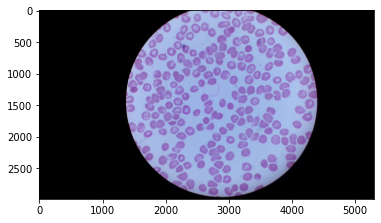

In [35]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
#img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
# img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
#img = cv2.flip(img, 1)
plt.imshow(img)

In [36]:
# cv2.circle(img, df_file['position'][240][0], 1, (0,255,0), 50)
# plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


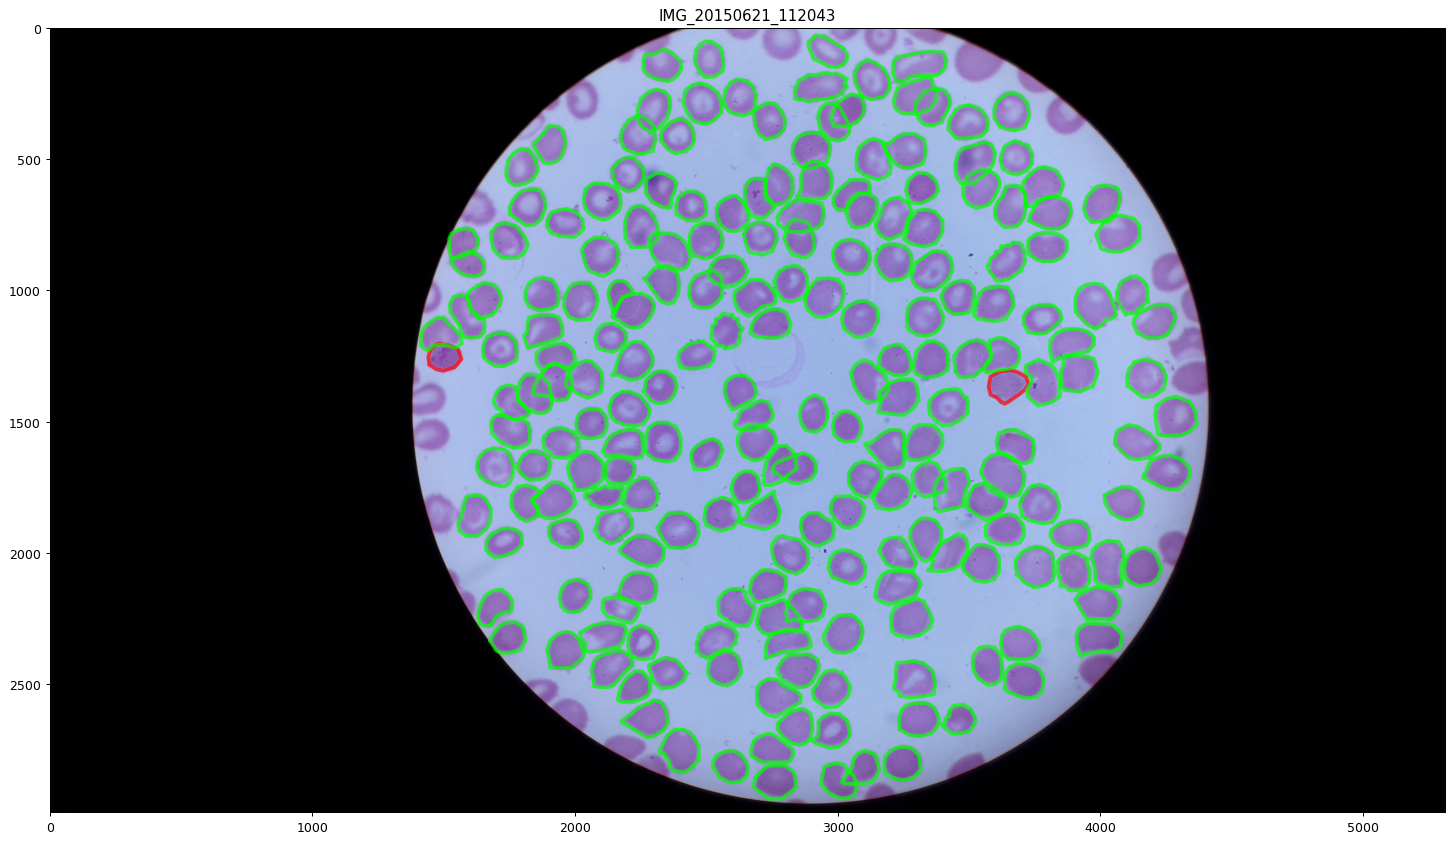

In [37]:
fig = plt.figure(1, figsize=(20,20), dpi=90)
df_file.apply(lambda row: draw_points(img, row['cell'], row['annotation_type'], row['position'], row), axis = 1)
plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


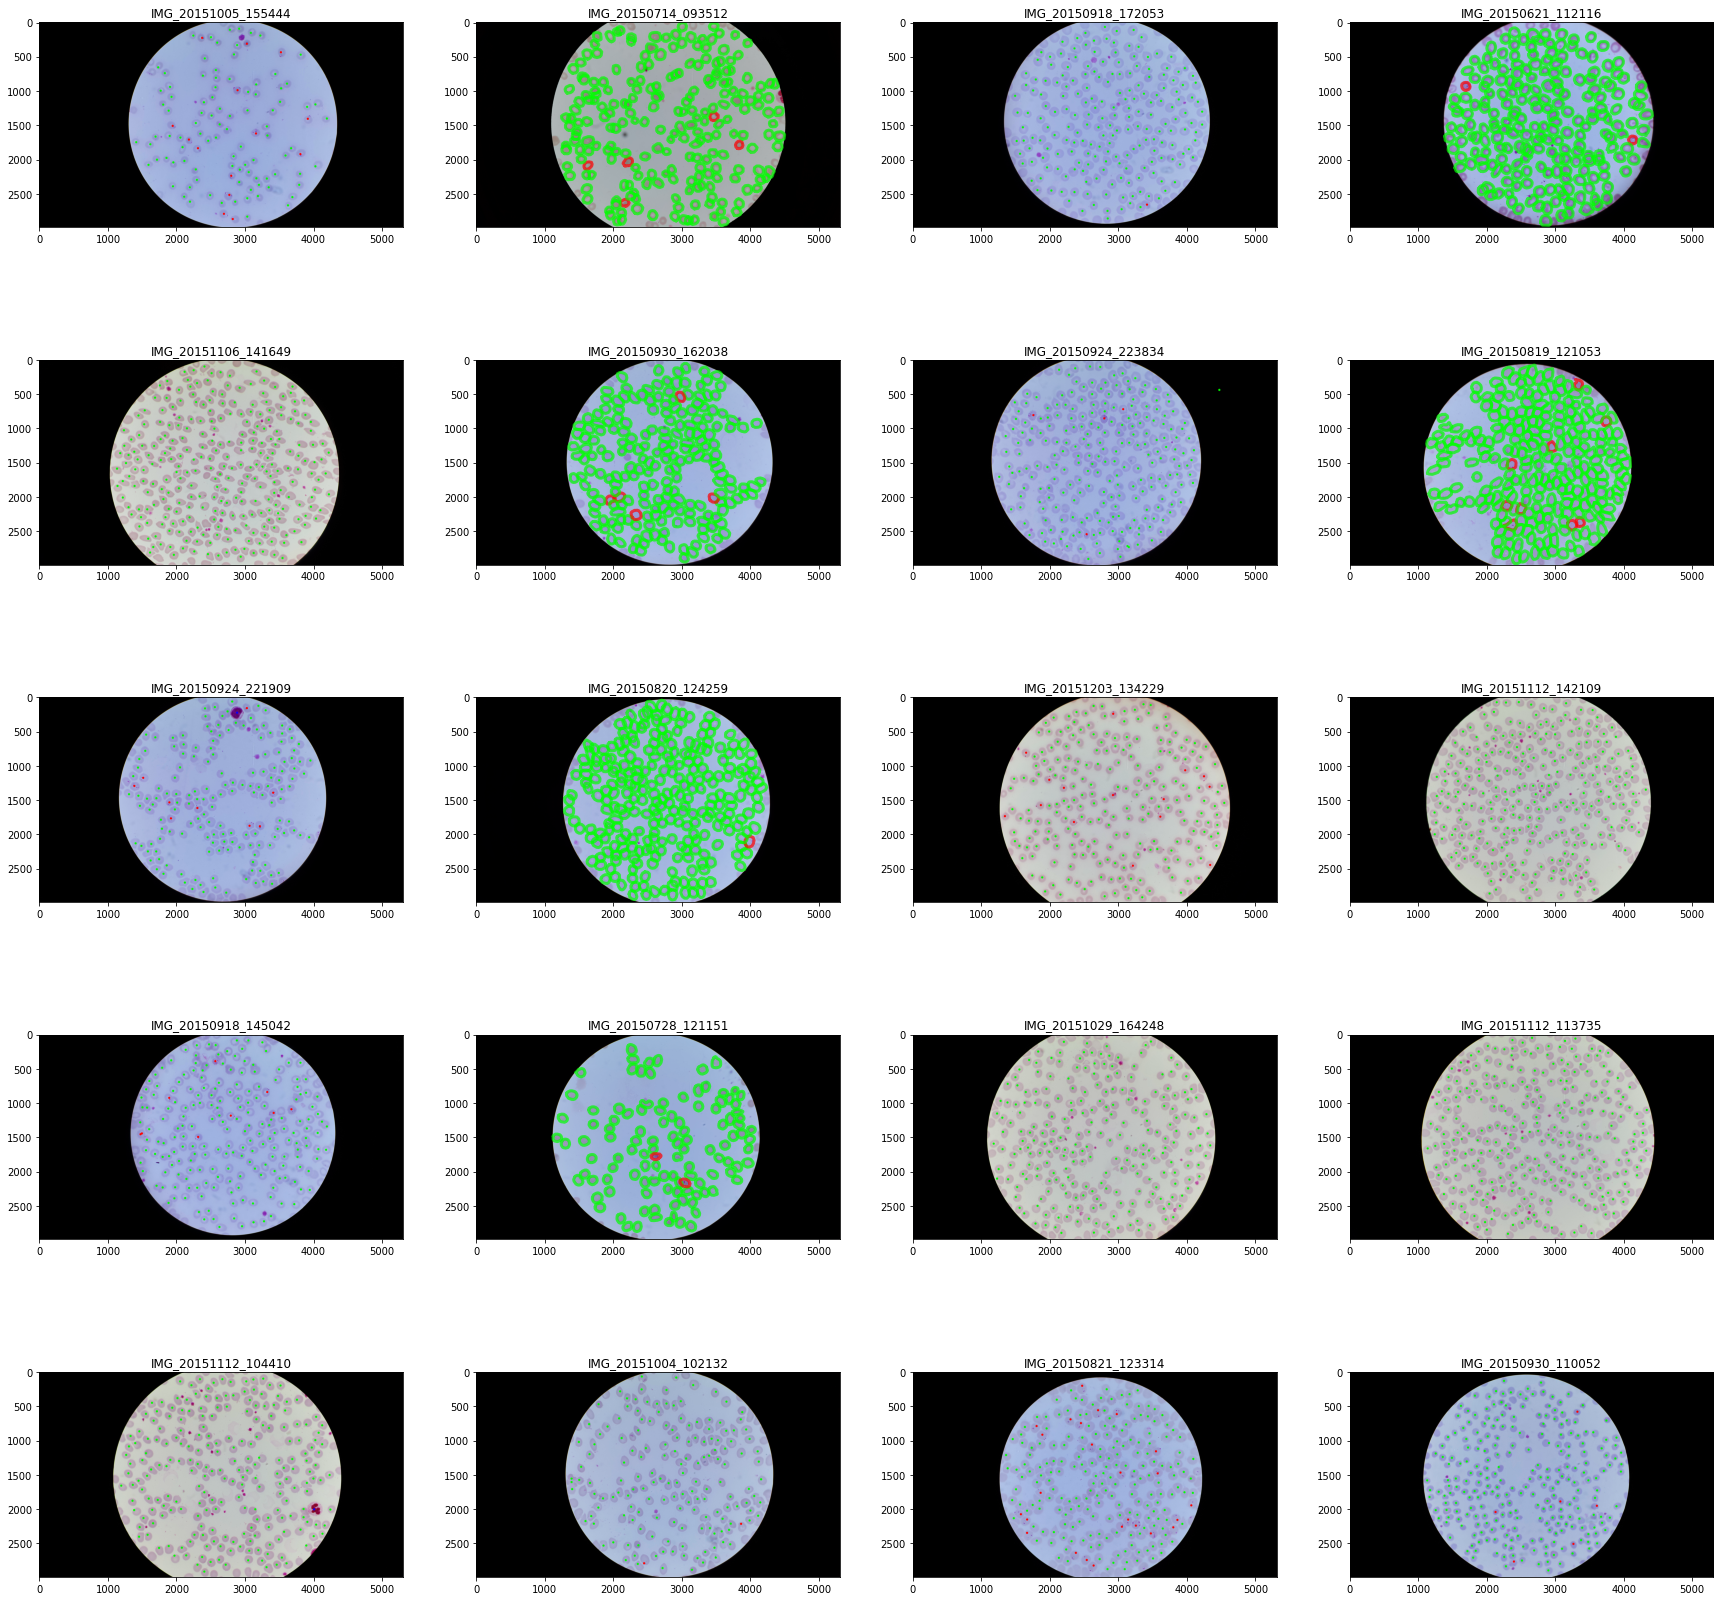

In [38]:
secure_random = random.SystemRandom()

w, h = 10, 10
fig=plt.figure(figsize=(30, 30))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    filename = secure_random.choice(df['filename'].unique())
    df_file = df[df['filename'] == filename]
    #print(filename)
    img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
    df_file.apply(lambda row: draw_points(img, row['cell'], row['annotation_type'], row['position'], row = row, rows = rows, columns = columns, i = i, point_size= 30), axis = 1)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Polygons to mask

In [39]:
def poly_mask(row):
    poly = Polygon(row['position'])
    mask = poly.ravel().tolist()

In [40]:
filename =  'IMG_20151029_162934'

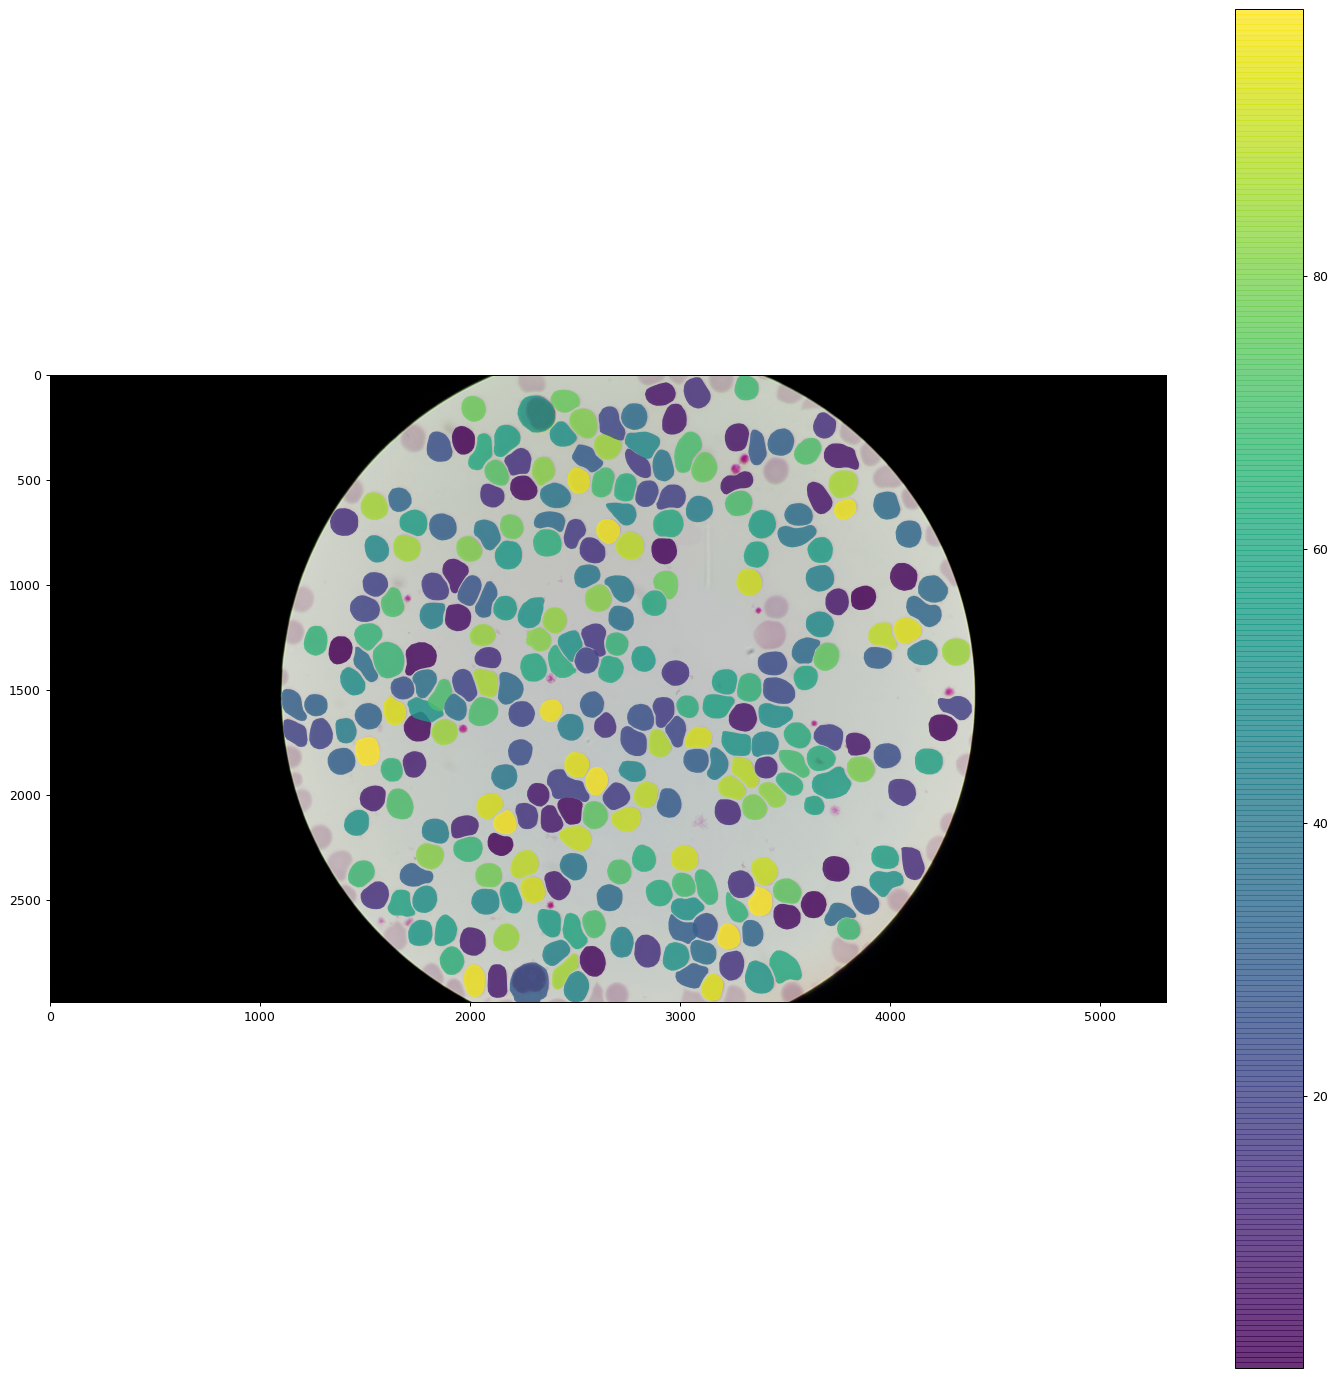

In [41]:
patches = []
patches = [ Polygon(poly) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position'] ]

img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)
empty_img = Image.new("L", [img.shape[1], img.shape[0]], 0)
mask = np.array(empty_img)

fig = plt.figure(1, figsize=(20,20), dpi=90)
ax = fig.add_subplot(111)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.8)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)
plt.imshow(img)

image shape:  <PIL.Image.Image image mode=1 size=5312x2988 at 0x7FF65D537BA8>


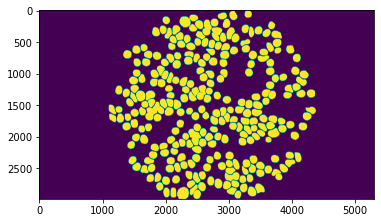

In [42]:
img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)

img = Image.new("L", [img.shape[1], img.shape[0]], 0)
img = img.convert('1')
print('image shape: ', img)
[ ImageDraw.Draw(img).polygon(poly, outline=1, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position']]
mask = np.array(img)

plt.imshow(mask)

img.save('Images/polygon_mask.png')

In [43]:
def poly2mask(filename):
    img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)
    img = Image.new("L", [img.shape[1], img.shape[0]], 0)
    img = img.convert('1')
    [ ImageDraw.Draw(img).polygon(poly, outline=0, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position']]
    # mask = np.array(img)
    # data = Image.fromarray(mask) 
    # # saving the final output  
    # # as a PNG file 
    # data = data.convert('1')
    # data.save(f'../masks/mask_{filename}.png')
    if not os.path.isdir('../data/masks'):
        os.makedirs('../data/masks')

    mask_path = f'../data/masks/mask_{filename}.png'
    img.save(mask_path)
    return mask, mask_path

In [44]:
filename =  'IMG_20150621_112043' #'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
...                                                  ...  
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  

[209 rows x 9 columns]

## Connected Components

In [45]:
def connected_component_label(img):
    # https://iq.opengenus.org/connected-component-labeling/
    # https://stackoverflow.com/questions/13572448/replace-values-of-a-numpy-index-array-with-values-of-a-list


    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    palette = np.arange(1, 179)
    list_rand_nums = np.random.randint(1,179, 179)
    # list_rand_nums gives the new values you wish palette to be mapped to.
    index = np.digitize(label_hue.ravel(), palette, right=True)
    random_hue = np.uint8(list_rand_nums[index].reshape(label_hue.shape))

    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([random_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(mask)
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGRA2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

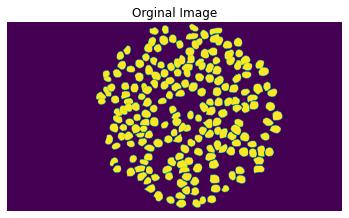

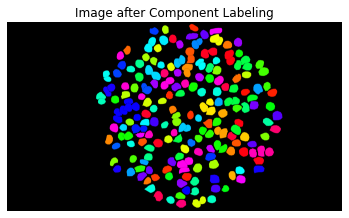

In [46]:
img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)
img = Image.new("L", [img.shape[1], img.shape[0]], 0)
#img = img.convert('1')
[ ImageDraw.Draw(img).polygon(poly, outline=0, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position']]
mask = np.array(img)
connected_component_label(mask)

In [47]:
num_labels, labels = cv2.connectedComponents(mask)
print(len(labels[0]))
print(np.max(labels))

5312
175


In [48]:
df

Patient no - Cell no        cell     comment annotation_type  \
0                       3-1  Uninfected  No_comment         Polygon   
1                       3-2  Uninfected  No_comment         Polygon   
2                       3-3  Uninfected  No_comment         Polygon   
3                       3-4  Uninfected  No_comment         Polygon   
4                       3-5  Uninfected  No_comment         Polygon   
...                     ...         ...         ...             ...   
196929                5-200  Uninfected  No_Comment           Point   
196930                5-201  Uninfected  No_Comment           Point   
196931                5-202  Uninfected  No_Comment           Point   
196932                5-203  Uninfected  No_Comment           Point   
196933                5-204  Uninfected  No_Comment           Point   

       Number of points                                           position  \
0                    14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                    15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                    14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                    14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                    14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
...                 ...                                                ...   
196929                1                                      [(2080, 643)]   
196930                1                                      [(1790, 606)]   
196931                1                                      [(1757, 756)]   
196932                1                                      [(1860, 856)]   
196933                1                                      [(1623, 683)]   

                   filename  \
0       IMG_20150817_103139   
1       IMG_20150817_103139   
2       IMG_20150817_103139   
3       IMG_20150817_103139   
4       IMG_20150817_103139   
...                     ...   
196929  IMG_20151115_181859   
196930  IMG_20151115_181859   
196931  IMG_20151115_181859   
196932  IMG_20151115_181859   
196933  IMG_20151115_181859   

                                                 txt_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
...                                                   ...  
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  

[196934 rows x 9 columns]

In [49]:
def get_bbx(position, annotation_type, bb_pixel):
    if annotation_type == 'Polygon':
        poly_list = np.array([list(ele) for ele in position])
        x_min = np.nanmin(poly_list[:, 0])
        x_max = np.nanmax(poly_list[:, 0])
        y_min = np.nanmin(poly_list[:, 1])
        y_max = np.nanmax(poly_list[:, 1])
        return [x_min, y_min, x_max, y_max]
    if annotation_type == 'Point':
        point_list = np.array(position)
        x_min = int(point_list[:, 0] - 0.5 * bb_pixel)
        x_max = int(point_list[:, 0] + 0.5 * bb_pixel)
        y_min = int(point_list[:, 1] - 0.5 * bb_pixel)
        y_max = int(point_list[:, 1] + 0.5 * bb_pixel)
        return [x_min, y_min, x_max, y_max]

In [50]:
df['bbx'] = df.apply(lambda row: get_bbx(row['position'], row['annotation_type'], 140), axis = 1)
df

Patient no - Cell no        cell     comment annotation_type  \
0                       3-1  Uninfected  No_comment         Polygon   
1                       3-2  Uninfected  No_comment         Polygon   
2                       3-3  Uninfected  No_comment         Polygon   
3                       3-4  Uninfected  No_comment         Polygon   
4                       3-5  Uninfected  No_comment         Polygon   
...                     ...         ...         ...             ...   
196929                5-200  Uninfected  No_Comment           Point   
196930                5-201  Uninfected  No_Comment           Point   
196931                5-202  Uninfected  No_Comment           Point   
196932                5-203  Uninfected  No_Comment           Point   
196933                5-204  Uninfected  No_Comment           Point   

       Number of points                                           position  \
0                    14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                    15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                    14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                    14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                    14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
...                 ...                                                ...   
196929                1                                      [(2080, 643)]   
196930                1                                      [(1790, 606)]   
196931                1                                      [(1757, 756)]   
196932                1                                      [(1860, 856)]   
196933                1                                      [(1623, 683)]   

                   filename  \
0       IMG_20150817_103139   
1       IMG_20150817_103139   
2       IMG_20150817_103139   
3       IMG_20150817_103139   
4       IMG_20150817_103139   
...                     ...   
196929  IMG_20151115_181859   
196930  IMG_20151115_181859   
196931  IMG_20151115_181859   
196932  IMG_20151115_181859   
196933  IMG_20151115_181859   

                                                 txt_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                           bbx  
0        [2905, 33, 3033, 131]  
1       [2951, 141, 3071, 272]  
2       [2658, 135, 2801, 276]  
3       [2332, 137, 2454, 265]  
4       [2499, 140, 2631, 272]  
...                        ...  
196929  [2010, 573, 2150, 713]  
196930  [1720, 536, 1860, 676]  
196931  [1687, 686, 1827, 826]  
196932  [1790, 786, 1930, 926]  
196933  [1553, 

## Tiling images and labels

(2988, 5312)


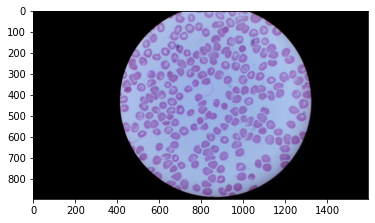

In [51]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
resize_factor = .3
print(img.shape[:2])
resized_img = cv2.resize(img, (int(round(img.shape[1] * resize_factor)), int(round(img.shape[0] * resize_factor))), interpolation=cv2.INTER_AREA)
plt.imshow(resized_img)

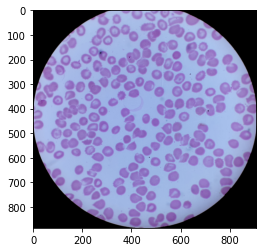

In [52]:
# select circle only
img_gray = rgb2gray(resized_img)
th = threshold_otsu(img_gray)
fg = img_gray>th
# Find the bounding box of those pixels
coords = np.array(np.nonzero(fg))
top_left = np.min(coords, axis=1)
bottom_right = np.max(coords, axis=1)

#set all under threshhold values to zero 
img_circle = resized_img*gray2rgb(fg)

img_cropped = img_circle[top_left[0]:bottom_right[0],
            top_left[1]:bottom_right[1]]

plt.imshow(img_cropped)

In [53]:
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
...                                                  ...  
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  

[209 rows x 9 columns]

In [54]:
def plot_tiles(img, tile_w, tile_h):
    img_shape = img.shape
    tile_size = (tile_w, tile_h)
    offset = (tile_w, tile_h)

    for x in range(int(math.ceil(img_shape[0]/(offset[1] * 1.0)))):
        #print(i)
        for y in range(int(math.ceil(img_shape[1]/(offset[0] * 1.0)))):
            #print(j)
            #print((offset[1]*i, min(offset[1]*i+tile_size[1], img_shape[0])), (offset[0]*j, min(offset[0]*j+tile_size[0], img_shape[1])))
            x_min = min(offset[1] * x + tile_size[1], img_shape[0])
            x_max = offset[1] * x
            y_min = min(offset[0] * y + tile_size[0], img_shape[1])
            y_max = offset[0]*y
            cv2.rectangle(img, (x_max, x_min), (y_max, y_min), (0, 0, 255), 3)
            #cropped_img = img[offset[1]*i:min(offset[1]*i+tile_size[1], img_shape[0]), offset[0]*j:min(offset[0]*j+tile_size[0], img_shape[1])]
            # Debugging the tiles
            #cv2.imwrite("debug_" + str(i) + "_" + str(j) + ".png", cropped_img)
    plt.imshow(crop_img)

def crop_tiles(img, tile_w, tile_h):
    img_shape = img.shape
    tile_size = (tile_w, tile_h)
    offset = (tile_w, tile_h)
    for x in range(int(math.ceil(img_shape[0]/(offset[1] * 1.0)))):
        for y in range(int(math.ceil(img_shape[1]/(offset[0] * 1.0)))):
            x_min = offset[1] * x
            x_max = min(offset[1] * x + tile_size[1], img_shape[0])
            y_min = offset[0]*y
            y_max = min(offset[0] * y + tile_size[0], img_shape[1])
            crop_image = img[x_min : x_min + tile_w, y_min: y_min + tile_h]
            cv2.imwrite(f'../cropped/{x_min}_{x_max}_{y_min}_{y_max}.png', crop_image) 
    #plt.imshow(crop_image)


In [55]:
crop_tiles(img_cropped, 256, 256)

In [56]:
def convert_labels(path, x1, y1, x2, y2):
    """
    Definition: Parses label files to extract label and bounding box
        coordinates.  Converts (x1, y1, x1, y2) KITTI format to
        (x, y, width, height) normalized YOLO format.
    """
    def sorting(l1, l2):
        if l1 > l2:
            lmax, lmin = l1, l2
            return lmax, lmin
        else:
            lmax, lmin = l2, l1
            return lmax, lmin
    size = get_img_shape(path)
    xmax, xmin = sorting(x1, x2)
    ymax, ymin = sorting(y1, y2)
    dw = 1./size[1]
    dh = 1./size[0]
    x = (xmin + xmax)/2.0
    y = (ymin + ymax)/2.0
    w = xmax - xmin
    h = ymax - ymin
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

In [57]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : list
        order: [x1, y1, x2, y2] 
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : list
        order: [x1, y1, x2, y2]
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [58]:
def get_intersection_percent(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : list
        order: [x1, y1, x2, y2] 
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : list
        order: [x1, y1, x2, y2]
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [59]:
get_intersection_percent( [0, 0, 10, 10], [0, 0, 20, 20])

1.0

In [60]:
###############################################################################
def slice_img(input_im, input_mask, 
                     filename,
                    outdir_im, 
                     outdir_mask,
                     outdir_label,
                      classes_dic, 
                     category, 
                     box_coords, resize_factor = 1,
                  sliceHeight=256, sliceWidth=256,
                  zero_frac_thresh=0, overlap=0, pad=0, verbose = False,
                  box_coords_dir='', yolt_coords_dir='', create_mask = False):
    '''
    ADAPTED FROM YOLT/SCRIPTS/SLICE_IM.PY
    Assume input_im is rgb
    Slice large image into smaller pieces,
    ignore slices with a percentage null greater then zero_fract_thresh'''
    if verbose == True:
        print('############# slice_img #############')
    img = cv2.imread(input_im, 1)  # color
    if create_mask:
        mask = cv2.imread(input_mask, 0)
    category_num = [classes_dic[k] for k in category] 

    resized_img = cv2.resize(img, (int(round(img.shape[1] * resize_factor)), int(round(img.shape[0] * resize_factor))))
    if create_mask == True:
        resized_mask = cv2.resize(mask, (int(round(mask.shape[1] * resize_factor)), int(round(mask.shape[0] * resize_factor))))
    resized_box_coords = np.array(np.round(np.array(box_coords) * np.array(resize_factor)).astype(int))


    im_h, im_w = resized_img.shape[:2]
    if verbose:
        print('im_h', im_h)
        print('im_w', im_w)

    win_size = sliceHeight*sliceWidth

    # if slice sizes are large than image, pad the edges
    if sliceHeight > im_h:
        pad = sliceHeight - im_h
    if sliceWidth > im_w:
        pad = max(pad, sliceWidth - im_w)
    # pad the edge of the image with black pixels
    if pad > 0:
        border_color = (0, 0, 0)
        resized_img = cv2.copyMakeBorder(resized_img, pad, pad, pad, pad,
                                   cv2.BORDER_CONSTANT, value=border_color)
        if create_mask == True:
            resized_mask = cv2.copyMakeBorder(resized_img, pad, pad, pad, pad,
                                cv2.BORDER_CONSTANT, value=border_color)

    t0 = time.time()
    n_ims = 0
    n_ims_nonull = 0
    dx = int((1. - overlap) * sliceWidth)
    dy = int((1. - overlap) * sliceHeight)
    if verbose:
        print('dx', dx)
        print('dy', dy)
    dict_yolo = {}
    dict_bbx = {}
    max_annot = 0

    for y in range(0, im_h, dy):  # sliceHeight):
        for x in range(0, im_w, dx):  # sliceWidth):
            n_ims += 1
            # extract image
            # make sure we don't go past the edge of the image
            if y + sliceHeight > im_h:
                y0 = im_h - sliceHeight
            else:
                y0 = y
            if x + sliceWidth > im_w:
                x0 = im_w - sliceWidth
            else:
                x0 = x

            window_c = resized_img[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
            if create_mask == True:
                window_mask = resized_mask[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
##           gt_c = gt_image[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
#             gt_c = image[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
            win_h, win_w = window_c.shape[:2]
    
            outname_part = 'slice_' + filename + \
            '_' + str(y0) + '_' + str(x0) + \
            '_' + str(win_h) + '_' + str(win_w) + \
            '_' + str(pad)

            if create_mask == True:
                outname_mask_part = 'slice_mask_' + filename + \
                    '_' + str(y0) + '_' + str(x0) + \
                    '_' + str(win_h) + '_' + str(win_w) + \
                    '_' + str(pad)
        
            # [x0, x1, y0, y1]


            # get black and white image
            window = cv2.cvtColor(window_c, cv2.COLOR_BGR2GRAY)

            # find threshold of image that's not black
            # https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html?highlight=threshold
            ret, thresh1 = cv2.threshold(window, 2, 255, cv2.THRESH_BINARY)
            non_zero_counts = cv2.countNonZero(thresh1)
            zero_counts = win_size - non_zero_counts
            zero_frac = float(zero_counts) / win_size
            # print ("zero_frac", zero_fra
            # skip if image is mostly empty
            if zero_frac >= zero_frac_thresh:
                if verbose:
                    print("Zero frac too high at:", zero_frac)
                continue
                
            new_box_coords = []
            yolt_coords = []
            annot_count = 0

            for box, cat in zip(resized_box_coords, category_num):
                cut_box = 0
                percent_in_cut_img = get_intersection_percent(box, [x0, y0, x0 + sliceWidth, y0 + sliceHeight])

                if percent_in_cut_img > 0.75:   
                    resized_box_cat = np.asarray([box[0] - x0, box[1] - y0, box[2] - x0, box[3] - y0, cat])
                    new_box_coords.append(resized_box_cat)
                    annot_count += 1
                    # Input to convert: image size: (w,h), box: [x0, x1, y0, y1]
                    #print(box)
                    yolt_co_i = convert((win_w, win_h), box)
                    yolt_coords.append(yolt_co_i)

                    
            if annot_count > max_annot:
                max_annot = annot_count

            #  save
            outname_im = os.path.join(outdir_im, outname_part + '.png')
            if create_mask == True:
                outname_mask = os.path.join(outdir_mask, outname_mask_part + '.png')
            txt_outpath = os.path.join(outdir_label, outname_part + '.txt')

            dict_yolo[outname_im] = yolt_coords
            dict_bbx[outname_im] = new_box_coords
          

            # save yolt ims
            if verbose:
                print("image output:", outname_im)
            cv2.imwrite(outname_im, window_c)
            if create_mask == True:
                cv2.imwrite(outname_mask, window_mask)

            # save yolt labels
            txt_outfile = open(txt_outpath, "w+")
            if verbose:
                print("txt output:" + txt_outpath)
            for bb in yolt_coords:
                outstring = str(category_num) + " " + \
                    " ".join([str(a) for a in bb]) + '\n'
                if verbose:
                    print("outstring:", outstring)
                txt_outfile.write(outstring)
            txt_outfile.close()

            # if desired, save coords files
            # save box coords dictionary so that yolt_eval.py can read it
            if len(box_coords_dir) > 0:
                coords_dic = gt_dic_from_box_coords(box_coords)
                outname_pkl = os.path.join(
                    box_coords_dir, outname_part + '_' + category + '.pkl')
                pickle.dump(coords_dic, open(outname_pkl, 'wb'), protocol=2)
            if len(yolt_coords_dir) > 0:
                outname_pkl = os.path.join(
                    yolt_coords_dir, outname_part + '_' + category + '.pkl')
                pickle.dump(yolt_coords, open(outname_pkl, 'wb'), protocol=2)

            n_ims_nonull += 1

    if verbose:
        print("Num slices:", n_ims, "Num non-null slices:", n_ims_nonull,
              "sliceHeight", sliceHeight, "sliceWidth", sliceWidth)
        print("Time to slice", input_im, time.time()-t0, "seconds")

    return dict_yolo, dict_bbx, max_annot

def convert(size, box):
    '''Input = image size: (w,h), box: [x0, x1, y0, y1]'''
    dw = 1./size[0]
    dh = 1./size[1]
    xmid = (box[0] + box[1])/2.0
    ymid = (box[2] + box[3])/2.0
    w0 = box[1] - box[0]
    h0 = box[3] - box[2]
    x = xmid*dw
    y = ymid*dh
    w = w0*dw
    h = h0*dh
    return (x, y, w, h)

In [61]:
def cut_images(df,
                slice_height = 256,
                slice_width = 256,
                resize_factor = 0.3,
                classes_dic = {'Uninfected': 0, 'Parasitized': 1, 'White_Blood_Cell': 2},
                zero_frac_thresh = 0.9, 
                overlap = 0, 
                pad = 0,
                verbose=False):
    
    
    dict_mask = {}
    dict_bbxs = {}
    total_max_annot = 0
    mask_path = ''
    outdir_mask = ''

    for filename in df['filename'].unique():
        create_mask = False
        if df.loc[(df['filename'] == filename),'annotation_type'].iloc[-1] ==  'Polygon':
            # first we create a black and white mask where the polygons are white
            mask, mask_path = poly2mask(filename)
            dict_mask[filename] = mask_path
            # now lets slice the images (and bbx although we will proabaly not use them)
            filename = df.loc[(df['filename'] == filename),'filename'].iloc[-1]
            img_path = df.loc[(df['filename'] == filename),'img_path'].iloc[-1]

            if not os.path.isdir('../data/cropped'):
                os.makedirs('../data/cropped')

            outdir_im = f'../data/cropped/{filename}/img'
            outdir_mask = f'../data/cropped/{filename}/mask'
            outdir_label = f'../data/cropped/{filename}/labels'
            check_if_outdir_im = os.path.isdir(outdir_im)
            check_if_outdir_mask = os.path.isdir(outdir_mask)
            check_if_outdir_label = os.path.isdir(outdir_label)

            if not check_if_outdir_im:
                os.makedirs(outdir_im)
            if not check_if_outdir_mask:
                os.makedirs(outdir_mask)
            if not check_if_outdir_label:
                os.makedirs(outdir_label)
            create_mask = True

        else: 
            # now lets slice the images (and bbx although we will proabaly not use them)
            filename = df.loc[(df['filename'] == filename),'filename'].iloc[-1]
            img_path = df.loc[(df['filename'] == filename),'img_path'].iloc[-1]

            if not os.path.isdir('../data/cropped'):
                os.makedirs('../data/cropped')

            outdir_im = f'../data/cropped/{filename}/img'
            outdir_label = f'../data/cropped/{filename}/labels'
            check_if_outdir_im = os.path.isdir(outdir_im)
            check_if_outdir_label = os.path.isdir(outdir_label)

            if not check_if_outdir_im:
                os.makedirs(outdir_im)
            if not check_if_outdir_label:
                os.makedirs(outdir_label)


        box_coords = df.loc[(df['filename'] == filename),'bbx'].tolist()
        category = df.loc[(df['filename'] == filename),'cell'].tolist()

        dict_yolo, dict_bbx, \
            max_annot = slice_img(img_path, mask_path, 
                                filename,
                                outdir_im, 
                                outdir_mask, 
                                outdir_label,
                                classes_dic, 
                                category, 
                                box_coords, 
                            sliceHeight= slice_height, sliceWidth=slice_width,
                            resize_factor = resize_factor,
                            zero_frac_thresh = zero_frac_thresh, overlap = overlap, pad = pad, verbose=False,
                            box_coords_dir='', yolt_coords_dir='', create_mask = create_mask)

        if max_annot > total_max_annot:
            total_max_annot = max_annot
            
        dict_bbxs.update(dict_bbx)
            
        print('filename: ', filename, ', len dict_bbx: ', len(dict_bbxs))

    return dict_yolo, dict_bbxs, dict_mask, total_max_annot

In [62]:
#df_para = df.loc[(df['cell'] == 'Parasitized')].reset_index(drop=True)
df_para = df

In [63]:
df.loc[(df['cell'] == 'Parasitized') & (df['filename'] == 'IMG_20151116_110921')]

Patient no - Cell no         cell     comment annotation_type  \
143669                  2-1  Parasitized  No_Comment           Point   
143780                2-112  Parasitized  No_Comment           Point   

       Number of points        position             filename  \
143669                1  [(3338, 2542)]  IMG_20151116_110921   
143780                1  [(2416, 2038)]  IMG_20151116_110921   

                                                 txt_path  \
143669  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
143780  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  \
143669  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
143780  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                             bbx  
143669  [3268, 2472, 3408, 2612]  
143780  [2346, 1968, 2486, 2108]

In [64]:
#dict_yolo, dict_bbxs, dict_mask, total_max_annot = cut_images(df_para, classes_dic = {'Parasitized': 1})
dict_yolo, dict_bbxs, dict_mask, total_max_annot = cut_images(df)

filename:  IMG_20150817_103139 , len dict_bbx:  15
filename:  IMG_20150817_103303 , len dict_bbx:  29
filename:  IMG_20150817_102702 , len dict_bbx:  43
filename:  IMG_20150817_102823 , len dict_bbx:  58
filename:  IMG_20150817_103901 , len dict_bbx:  73
filename:  IMG_20150725_123938 , len dict_bbx:  89
filename:  IMG_20150725_125213 , len dict_bbx:  105
filename:  IMG_20150725_125847 , len dict_bbx:  121
filename:  IMG_20150725_124606 , len dict_bbx:  137
filename:  IMG_20150725_124830 , len dict_bbx:  153
filename:  IMG_20151004_130810 , len dict_bbx:  167
filename:  IMG_20151004_130408 , len dict_bbx:  181
filename:  IMG_20151004_130549 , len dict_bbx:  195
filename:  IMG_20151004_131030 , len dict_bbx:  209
filename:  IMG_20151004_131129 , len dict_bbx:  223
filename:  IMG_20151029_162934 , len dict_bbx:  240
filename:  IMG_20151029_162357 , len dict_bbx:  257
filename:  IMG_20151029_162605 , len dict_bbx:  274
filename:  IMG_20151029_162439 , len dict_bbx:  291
filename:  IMG_201

filename:  IMG_20150813_163120 , len dict_bbx:  2491
filename:  IMG_20150813_161634 , len dict_bbx:  2506
filename:  IMG_20150813_162554 , len dict_bbx:  2521
filename:  IMG_20150813_162146 , len dict_bbx:  2536
filename:  IMG_20151119_143039 , len dict_bbx:  2553
filename:  IMG_20151118_163539 , len dict_bbx:  2569
filename:  IMG_20151119_143212 , len dict_bbx:  2585
filename:  IMG_20151118_172913 , len dict_bbx:  2601
filename:  IMG_20151118_173039 , len dict_bbx:  2619
filename:  IMG_20151115_151211 , len dict_bbx:  2635
filename:  IMG_20151115_150057 , len dict_bbx:  2652
filename:  IMG_20151115_151015 , len dict_bbx:  2668
filename:  IMG_20151115_150925 , len dict_bbx:  2684
filename:  IMG_20151115_150728 , len dict_bbx:  2700
filename:  IMG_20151112_144652 , len dict_bbx:  2717
filename:  IMG_20151112_144147 , len dict_bbx:  2733
filename:  IMG_20151112_144222 , len dict_bbx:  2750
filename:  IMG_20151112_144534 , len dict_bbx:  2767
filename:  IMG_20151112_144613 , len dict_bbx:

filename:  IMG_20151002_133540 , len dict_bbx:  5024
filename:  IMG_20151002_133427 , len dict_bbx:  5038
filename:  IMG_20151002_133158 , len dict_bbx:  5052
filename:  IMG_20151002_132926 , len dict_bbx:  5066
filename:  IMG_20151005_141946 , len dict_bbx:  5080
filename:  IMG_20151005_141803 , len dict_bbx:  5094
filename:  IMG_20151005_140538 , len dict_bbx:  5108
filename:  IMG_20151005_140646 , len dict_bbx:  5122
filename:  IMG_20151005_141321 , len dict_bbx:  5136
filename:  IMG_20150918_170850 , len dict_bbx:  5150
filename:  IMG_20150918_172214 , len dict_bbx:  5164
filename:  IMG_20150918_171751 , len dict_bbx:  5178
filename:  IMG_20150918_172053 , len dict_bbx:  5192
filename:  IMG_20150918_171154 , len dict_bbx:  5208
filename:  IMG_20150609_122034 , len dict_bbx:  5223
filename:  IMG_20150609_122227 , len dict_bbx:  5242
filename:  IMG_20150609_122108 , len dict_bbx:  5257
filename:  IMG_20150609_122006 , len dict_bbx:  5272
filename:  IMG_20150609_122020 , len dict_bbx:

filename:  IMG_20150821_124504 , len dict_bbx:  7476
filename:  IMG_20150821_123314 , len dict_bbx:  7491
filename:  IMG_20150821_124937 , len dict_bbx:  7506
filename:  IMG_20150821_124739 , len dict_bbx:  7521
filename:  IMG_20151005_183338 , len dict_bbx:  7535
filename:  IMG_20151005_182257 , len dict_bbx:  7551
filename:  IMG_20151005_182822 , len dict_bbx:  7565
filename:  IMG_20151005_182410 , len dict_bbx:  7579
filename:  IMG_20151005_182527 , len dict_bbx:  7593
filename:  IMG_20150609_122547 , len dict_bbx:  7608
filename:  IMG_20150609_122327 , len dict_bbx:  7627
filename:  IMG_20150609_121955 , len dict_bbx:  7646
filename:  IMG_20150609_122421 , len dict_bbx:  7661
filename:  IMG_20150609_122725 , len dict_bbx:  7678
filename:  IMG_20151119_120111 , len dict_bbx:  7695
filename:  IMG_20151119_120019 , len dict_bbx:  7712
filename:  IMG_20151119_120150 , len dict_bbx:  7729
filename:  IMG_20151119_115918 , len dict_bbx:  7746
filename:  IMG_20151119_120233 , len dict_bbx:

filename:  IMG_20151116_102655 , len dict_bbx:  9977
filename:  IMG_20151116_104451 , len dict_bbx:  9993
filename:  IMG_20151116_104342 , len dict_bbx:  10009
filename:  IMG_20151116_102751 , len dict_bbx:  10025
filename:  IMG_20150821_115846 , len dict_bbx:  10040
filename:  IMG_20150821_115310 , len dict_bbx:  10055
filename:  IMG_20150821_120044 , len dict_bbx:  10070
filename:  IMG_20150821_115700 , len dict_bbx:  10085
filename:  IMG_20150821_115056 , len dict_bbx:  10100
filename:  IMG_20150818_164008 , len dict_bbx:  10116
filename:  IMG_20150818_163551 , len dict_bbx:  10132
filename:  IMG_20150818_164702 , len dict_bbx:  10148
filename:  IMG_20150818_163419 , len dict_bbx:  10164
filename:  IMG_20150818_164408 , len dict_bbx:  10180
filename:  IMG_20151203_150222 , len dict_bbx:  10199
filename:  IMG_20151203_150322 , len dict_bbx:  10218
filename:  IMG_20151203_150132 , len dict_bbx:  10237
filename:  IMG_20151203_150408 , len dict_bbx:  10256
filename:  IMG_20151203_150557

filename:  IMG_20150930_102716 , len dict_bbx:  12424
filename:  IMG_20150930_103214 , len dict_bbx:  12440
filename:  IMG_20150815_163225 , len dict_bbx:  12456
filename:  IMG_20150815_162935 , len dict_bbx:  12472
filename:  IMG_20150815_163147 , len dict_bbx:  12488
filename:  IMG_20150815_163015 , len dict_bbx:  12504
filename:  IMG_20150815_163059 , len dict_bbx:  12520
filename:  IMG_20151015_155149 , len dict_bbx:  12537
filename:  IMG_20151015_163142 , len dict_bbx:  12553
filename:  IMG_20151015_155004 , len dict_bbx:  12569
filename:  IMG_20151015_160529 , len dict_bbx:  12586
filename:  IMG_20151015_160908 , len dict_bbx:  12603
filename:  IMG_20150724_153313 , len dict_bbx:  12618
filename:  IMG_20150724_155046 , len dict_bbx:  12633
filename:  IMG_20150724_155557 , len dict_bbx:  12648
filename:  IMG_20150724_154330 , len dict_bbx:  12663
filename:  IMG_20150724_154243 , len dict_bbx:  12678
filename:  IMG_20151115_190642 , len dict_bbx:  12694
filename:  IMG_20151115_1855

filename:  IMG_20151115_153831 , len dict_bbx:  14765
filename:  IMG_20151115_154022 , len dict_bbx:  14781
filename:  IMG_20151115_155104 , len dict_bbx:  14797
filename:  IMG_20151115_154435 , len dict_bbx:  14813
filename:  IMG_20151115_154313 , len dict_bbx:  14829
filename:  IMG_20150614_131553 , len dict_bbx:  14844
filename:  IMG_20150614_131417 , len dict_bbx:  14859
filename:  IMG_20150614_131529 , len dict_bbx:  14875
filename:  IMG_20150614_131457 , len dict_bbx:  14890
filename:  IMG_20150614_131318 , len dict_bbx:  14905
filename:  IMG_20150918_145422 , len dict_bbx:  14919
filename:  IMG_20150918_144823 , len dict_bbx:  14933
filename:  IMG_20150918_144348 , len dict_bbx:  14947
filename:  IMG_20150918_145042 , len dict_bbx:  14961
filename:  IMG_20150918_144104 , len dict_bbx:  14975
filename:  IMG_20150817_124418 , len dict_bbx:  14990
filename:  IMG_20150817_123824 , len dict_bbx:  15005
filename:  IMG_20150817_123500 , len dict_bbx:  15019
filename:  IMG_20150817_1236

In [65]:
df['mask_path'] = df['filename'].map(dict_mask)

In [66]:
len(dict_bbxs.keys())

15381

In [67]:
# same as above however this time checking for image slice with most parasites

imgs_name = keys = np.array(list(dict_bbxs.keys()))
true_boxes = np.zeros((imgs_name.shape[0], total_max_annot, 5))
print('imgs_name.shape: ', imgs_name.shape)
print('max_annot: ', total_max_annot)
print('true_boxes shape: ', true_boxes.shape)

max_parasitized = {}
            
for key, boxes in dict_bbxs.items():
    count_para = 0
    boxes = np.asarray(boxes)
    idx = int(np.where(imgs_name == key)[0])
    print('boxes shape: ', boxes.shape)
    print('key: ', key)
    print('index in list: ', idx)

    if len(boxes) != 0:
        for box in boxes:
            if box[4] == 1:
                count_para += 1
    max_parasitized[idx] = count_para
    
    if len(boxes) == 0:
        boxes = np.asarray([[0,0,0,0,0]])
    true_boxes[idx, :boxes.shape[0], :5] = boxes

imgs_name.shape:  (15381,)
max_annot:  35
true_boxes shape:  (15381, 35, 5)
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_0_512_256_256_0.png
index in list:  0
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_0_768_256_256_0.png
index in list:  1
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_0_1024_256_256_0.png
index in list:  2
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_256_256_256_256_0.png
index in list:  3
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_256_512_256_256_0.png
index in list:  4
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_256_768_256_256_0.png
index in list:  5
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150817_103139/img/slice_IMG_20150817_103139_256_1024_256_256_0.png
index in l

boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150817_103901/img/slice_IMG_20150817_103901_640_768_256_256_0.png
index in list:  71
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150817_103901/img/slice_IMG_20150817_103901_640_1024_256_256_0.png
index in list:  72
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150725_123938/img/slice_IMG_20150725_123938_0_256_256_256_0.png
index in list:  73
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150725_123938/img/slice_IMG_20150725_123938_0_512_256_256_0.png
index in list:  74
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150725_123938/img/slice_IMG_20150725_123938_0_768_256_256_0.png
index in list:  75
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150725_123938/img/slice_IMG_20150725_123938_0_1024_256_256_0.png
index in list:  76
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150725_123938/img/slice_IMG_20150725_123938_256_256_256_256_0.png
index in list:  77
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150725_123938/im

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_512_1024_256_256_0.png
index in list:  191
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_640_512_256_256_0.png
index in list:  192
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_640_768_256_256_0.png
index in list:  193
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151004_130549/img/slice_IMG_20151004_130549_640_1024_256_256_0.png
index in list:  194
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151004_131030/img/slice_IMG_20151004_131030_0_512_256_256_0.png
index in list:  195
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_131030/img/slice_IMG_20151004_131030_0_768_256_256_0.png
index in list:  196
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151004_131030/img/slice_IMG_20151004_131030_0_1024_256_256_0.png
index in list:  197
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151004_

key:  ../data/cropped/IMG_20151112_153246/img/slice_IMG_20151112_153246_640_1024_256_256_0.png
index in list:  324
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151112_153041/img/slice_IMG_20151112_153041_0_256_256_256_0.png
index in list:  325
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151112_153041/img/slice_IMG_20151112_153041_0_512_256_256_0.png
index in list:  326
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151112_153041/img/slice_IMG_20151112_153041_0_768_256_256_0.png
index in list:  327
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151112_153041/img/slice_IMG_20151112_153041_0_1024_256_256_0.png
index in list:  328
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151112_153041/img/slice_IMG_20151112_153041_256_256_256_256_0.png
index in list:  329
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151112_153041/img/slice_IMG_20151112_153041_256_512_256_256_0.png
index in list:  330
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_153041/img/slice_IMG_2

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150820_124025/img/slice_IMG_20150820_124025_512_1024_256_256_0.png
index in list:  433
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150820_124025/img/slice_IMG_20150820_124025_640_256_256_256_0.png
index in list:  434
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150820_124025/img/slice_IMG_20150820_124025_640_512_256_256_0.png
index in list:  435
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150820_124025/img/slice_IMG_20150820_124025_640_768_256_256_0.png
index in list:  436
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150820_124025/img/slice_IMG_20150820_124025_640_1024_256_256_0.png
index in list:  437
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150820_123717/img/slice_IMG_20150820_123717_0_512_256_256_0.png
index in list:  438
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150820_123717/img/slice_IMG_20150820_123717_0_768_256_256_0.png
index in list:  439
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151203_154111/img/slice_IMG_20151203_154111_512_1024_256_256_0.png
index in list:  554
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151203_154111/img/slice_IMG_20151203_154111_512_1280_256_256_0.png
index in list:  555
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151203_154111/img/slice_IMG_20151203_154111_640_256_256_256_0.png
index in list:  556
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151203_154111/img/slice_IMG_20151203_154111_640_512_256_256_0.png
index in list:  557
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151203_154111/img/slice_IMG_20151203_154111_640_768_256_256_0.png
index in list:  558
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151203_154111/img/slice_IMG_20151203_154111_640_1024_256_256_0.png
index in list:  559
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151203_154111/img/slice_IMG_20151203_154111_640_1280_256_256_0.png
index in list:  560
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_201507

boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151004_104408/img/slice_IMG_20151004_104408_512_256_256_256_0.png
index in list:  678
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151004_104408/img/slice_IMG_20151004_104408_512_512_256_256_0.png
index in list:  679
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151004_104408/img/slice_IMG_20151004_104408_512_768_256_256_0.png
index in list:  680
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151004_104408/img/slice_IMG_20151004_104408_512_1024_256_256_0.png
index in list:  681
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151004_104408/img/slice_IMG_20151004_104408_640_512_256_256_0.png
index in list:  682
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151004_104408/img/slice_IMG_20151004_104408_640_768_256_256_0.png
index in list:  683
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151004_104408/img/slice_IMG_20151004_104408_640_1024_256_256_0.png
index in list:  684
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_2

boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151116_093109/img/slice_IMG_20151116_093109_256_256_256_256_0.png
index in list:  797
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151116_093109/img/slice_IMG_20151116_093109_256_512_256_256_0.png
index in list:  798
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151116_093109/img/slice_IMG_20151116_093109_256_768_256_256_0.png
index in list:  799
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151116_093109/img/slice_IMG_20151116_093109_256_1024_256_256_0.png
index in list:  800
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151116_093109/img/slice_IMG_20151116_093109_512_256_256_256_0.png
index in list:  801
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151116_093109/img/slice_IMG_20151116_093109_512_512_256_256_0.png
index in list:  802
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151116_093109/img/slice_IMG_20151116_093109_512_768_256_256_0.png
index in list:  803
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150820_163347/img/slice_IMG_20150820_163347_640_256_256_256_0.png
index in list:  914
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150820_163347/img/slice_IMG_20150820_163347_640_512_256_256_0.png
index in list:  915
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150820_163347/img/slice_IMG_20150820_163347_640_768_256_256_0.png
index in list:  916
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150820_163347/img/slice_IMG_20150820_163347_640_1024_256_256_0.png
index in list:  917
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150820_162504/img/slice_IMG_20150820_162504_0_512_256_256_0.png
index in list:  918
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150820_162504/img/slice_IMG_20150820_162504_0_768_256_256_0.png
index in list:  919
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150820_162504/img/slice_IMG_20150820_162504_0_1024_256_256_0.png
index in list:  920
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150820

boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151201_142514/img/slice_IMG_20151201_142514_512_768_256_256_0.png
index in list:  1035
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151201_142514/img/slice_IMG_20151201_142514_512_1024_256_256_0.png
index in list:  1036
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151201_142514/img/slice_IMG_20151201_142514_512_1280_256_256_0.png
index in list:  1037
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_142514/img/slice_IMG_20151201_142514_512_1338_256_256_0.png
index in list:  1038
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151201_142514/img/slice_IMG_20151201_142514_640_512_256_256_0.png
index in list:  1039
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151201_142514/img/slice_IMG_20151201_142514_640_768_256_256_0.png
index in list:  1040
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151201_142514/img/slice_IMG_20151201_142514_640_1024_256_256_0.png
index in list:  1041
boxes shape:  (2, 5)
key:  ../data/crop

boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151106_112853/img/slice_IMG_20151106_112853_512_512_256_256_0.png
index in list:  1158
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20151106_112853/img/slice_IMG_20151106_112853_512_768_256_256_0.png
index in list:  1159
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151106_112853/img/slice_IMG_20151106_112853_512_1024_256_256_0.png
index in list:  1160
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151106_112853/img/slice_IMG_20151106_112853_640_256_256_256_0.png
index in list:  1161
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151106_112853/img/slice_IMG_20151106_112853_640_512_256_256_0.png
index in list:  1162
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151106_112853/img/slice_IMG_20151106_112853_640_768_256_256_0.png
index in list:  1163
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151106_112853/img/slice_IMG_20151106_112853_640_1024_256_256_0.png
index in list:  1164
boxes shape:  (3, 5)
key:  ../data/cropp

boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_512_768_256_256_0.png
index in list:  1297
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_512_1024_256_256_0.png
index in list:  1298
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_640_256_256_256_0.png
index in list:  1299
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_640_512_256_256_0.png
index in list:  1300
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_640_768_256_256_0.png
index in list:  1301
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150724_103233/img/slice_IMG_20150724_103233_640_1024_256_256_0.png
index in list:  1302
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150724_102843/img/slice_IMG_20150724_102843_0_512_256_256_0.png
index in list:  1303
boxes shape:  (16, 5)
key:  ../data/cropped

boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20151106_110230/img/slice_IMG_20151106_110230_512_768_256_256_0.png
index in list:  1358
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_110230/img/slice_IMG_20151106_110230_512_1024_256_256_0.png
index in list:  1359
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151106_110230/img/slice_IMG_20151106_110230_640_256_256_256_0.png
index in list:  1360
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151106_110230/img/slice_IMG_20151106_110230_640_512_256_256_0.png
index in list:  1361
boxes shape:  (27, 5)
key:  ../data/cropped/IMG_20151106_110230/img/slice_IMG_20151106_110230_640_768_256_256_0.png
index in list:  1362
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151106_110230/img/slice_IMG_20151106_110230_640_1024_256_256_0.png
index in list:  1363
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151106_105834/img/slice_IMG_20151106_105834_0_256_256_256_0.png
index in list:  1364
boxes shape:  (20, 5)
key:  ../data/cropped

boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151112_164834/img/slice_IMG_20151112_164834_0_1024_256_256_0.png
index in list:  1465
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151112_164834/img/slice_IMG_20151112_164834_256_256_256_256_0.png
index in list:  1466
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151112_164834/img/slice_IMG_20151112_164834_256_512_256_256_0.png
index in list:  1467
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151112_164834/img/slice_IMG_20151112_164834_256_768_256_256_0.png
index in list:  1468
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151112_164834/img/slice_IMG_20151112_164834_256_1024_256_256_0.png
index in list:  1469
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151112_164834/img/slice_IMG_20151112_164834_256_1280_256_256_0.png
index in list:  1470
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151112_164834/img/slice_IMG_20151112_164834_512_256_256_256_0.png
index in list:  1471
boxes shape:  (20, 5)
key:  ../data/cropp

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151002_144341/img/slice_IMG_20151002_144341_0_512_256_256_0.png
index in list:  1527
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151002_144341/img/slice_IMG_20151002_144341_0_768_256_256_0.png
index in list:  1528
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151002_144341/img/slice_IMG_20151002_144341_0_1024_256_256_0.png
index in list:  1529
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151002_144341/img/slice_IMG_20151002_144341_256_256_256_256_0.png
index in list:  1530
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151002_144341/img/slice_IMG_20151002_144341_256_512_256_256_0.png
index in list:  1531
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151002_144341/img/slice_IMG_20151002_144341_256_768_256_256_0.png
index in list:  1532
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151002_144341/img/slice_IMG_20151002_144341_256_1024_256_256_0.png
index in list:  1533
boxes shape:  (0,)
key:  ../data/cropped/IMG_201

boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151112_131546/img/slice_IMG_20151112_131546_512_768_256_256_0.png
index in list:  1631
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151112_131546/img/slice_IMG_20151112_131546_512_1024_256_256_0.png
index in list:  1632
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151112_131546/img/slice_IMG_20151112_131546_640_256_256_256_0.png
index in list:  1633
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151112_131546/img/slice_IMG_20151112_131546_640_512_256_256_0.png
index in list:  1634
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_131546/img/slice_IMG_20151112_131546_640_768_256_256_0.png
index in list:  1635
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151112_131546/img/slice_IMG_20151112_131546_640_1024_256_256_0.png
index in list:  1636
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151112_131408/img/slice_IMG_20151112_131408_0_256_256_256_0.png
index in list:  1637
boxes shape:  (19, 5)
key:  ../data/cropped

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_512_768_256_256_0.png
index in list:  1694
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_512_1024_256_256_0.png
index in list:  1695
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_640_512_256_256_0.png
index in list:  1696
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_640_768_256_256_0.png
index in list:  1697
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151005_121425/img/slice_IMG_20151005_121425_640_1024_256_256_0.png
index in list:  1698
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151005_121554/img/slice_IMG_20151005_121554_0_512_256_256_0.png
index in list:  1699
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151005_121554/img/slice_IMG_20151005_121554_0_768_256_256_0.png
index in list:  1700
boxes shape:  (3, 5)
key:  ../data/cropped/I

key:  ../data/cropped/IMG_20150819_133350/img/slice_IMG_20150819_133350_640_1024_256_256_0.png
index in list:  1804
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150819_134112/img/slice_IMG_20150819_134112_0_256_256_256_0.png
index in list:  1805
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150819_134112/img/slice_IMG_20150819_134112_0_512_256_256_0.png
index in list:  1806
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150819_134112/img/slice_IMG_20150819_134112_0_768_256_256_0.png
index in list:  1807
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150819_134112/img/slice_IMG_20150819_134112_0_1024_256_256_0.png
index in list:  1808
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150819_134112/img/slice_IMG_20150819_134112_256_256_256_256_0.png
index in list:  1809
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150819_134112/img/slice_IMG_20150819_134112_256_512_256_256_0.png
index in list:  1810
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150819_134112/img/sli

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150819_121240/img/slice_IMG_20150819_121240_0_1024_256_256_0.png
index in list:  1928
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150819_121240/img/slice_IMG_20150819_121240_256_256_256_256_0.png
index in list:  1929
boxes shape:  (33, 5)
key:  ../data/cropped/IMG_20150819_121240/img/slice_IMG_20150819_121240_256_512_256_256_0.png
index in list:  1930
boxes shape:  (29, 5)
key:  ../data/cropped/IMG_20150819_121240/img/slice_IMG_20150819_121240_256_768_256_256_0.png
index in list:  1931
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150819_121240/img/slice_IMG_20150819_121240_256_1024_256_256_0.png
index in list:  1932
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150819_121240/img/slice_IMG_20150819_121240_512_256_256_256_0.png
index in list:  1933
boxes shape:  (29, 5)
key:  ../data/cropped/IMG_20150819_121240/img/slice_IMG_20150819_121240_512_512_256_256_0.png
index in list:  1934
boxes shape:  (31, 5)
key:  ../data/cropped

boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151207_114653/img/slice_IMG_20151207_114653_0_512_256_256_0.png
index in list:  2101
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151207_114653/img/slice_IMG_20151207_114653_0_768_256_256_0.png
index in list:  2102
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151207_114653/img/slice_IMG_20151207_114653_0_1024_256_256_0.png
index in list:  2103
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151207_114653/img/slice_IMG_20151207_114653_256_256_256_256_0.png
index in list:  2104
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151207_114653/img/slice_IMG_20151207_114653_256_512_256_256_0.png
index in list:  2105
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151207_114653/img/slice_IMG_20151207_114653_256_768_256_256_0.png
index in list:  2106
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151207_114653/img/slice_IMG_20151207_114653_256_1024_256_256_0.png
index in list:  2107
boxes shape:  (12, 5)
key:  ../data/cropped/IMG

boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150714_093600/img/slice_IMG_20150714_093600_512_1024_256_256_0.png
index in list:  2162
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150714_093600/img/slice_IMG_20150714_093600_512_1280_256_256_0.png
index in list:  2163
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150714_093600/img/slice_IMG_20150714_093600_640_256_256_256_0.png
index in list:  2164
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150714_093600/img/slice_IMG_20150714_093600_640_512_256_256_0.png
index in list:  2165
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150714_093600/img/slice_IMG_20150714_093600_640_768_256_256_0.png
index in list:  2166
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150714_093600/img/slice_IMG_20150714_093600_640_1024_256_256_0.png
index in list:  2167
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150714_093806/img/slice_IMG_20150714_093806_0_256_256_256_0.png
index in list:  2168
boxes shape:  (12, 5)
key:  ../data/cropped/

boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150813_130510/img/slice_IMG_20150813_130510_256_768_256_256_0.png
index in list:  2276
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150813_130510/img/slice_IMG_20150813_130510_256_1024_256_256_0.png
index in list:  2277
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150813_130510/img/slice_IMG_20150813_130510_512_256_256_256_0.png
index in list:  2278
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150813_130510/img/slice_IMG_20150813_130510_512_512_256_256_0.png
index in list:  2279
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150813_130510/img/slice_IMG_20150813_130510_512_768_256_256_0.png
index in list:  2280
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150813_130510/img/slice_IMG_20150813_130510_512_1024_256_256_0.png
index in list:  2281
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150813_130510/img/slice_IMG_20150813_130510_640_256_256_256_0.png
index in list:  2282
boxes shape:  (8, 5)
key:  ../data/cropped/IMG

boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_512_768_256_256_0.png
index in list:  2439
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_512_1024_256_256_0.png
index in list:  2440
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_640_256_256_256_0.png
index in list:  2441
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_640_512_256_256_0.png
index in list:  2442
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_640_768_256_256_0.png
index in list:  2443
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150729_111518/img/slice_IMG_20150729_111518_640_1024_256_256_0.png
index in list:  2444
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150729_110457/img/slice_IMG_20150729_110457_0_256_256_256_0.png
index in list:  2445
boxes shape:  (19, 5)
key:  ../data/cropped

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151118_173039/img/slice_IMG_20151118_173039_256_1280_256_256_0.png
index in list:  2609
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151118_173039/img/slice_IMG_20151118_173039_256_1338_256_256_0.png
index in list:  2610
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151118_173039/img/slice_IMG_20151118_173039_512_256_256_256_0.png
index in list:  2611
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151118_173039/img/slice_IMG_20151118_173039_512_512_256_256_0.png
index in list:  2612
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151118_173039/img/slice_IMG_20151118_173039_512_768_256_256_0.png
index in list:  2613
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151118_173039/img/slice_IMG_20151118_173039_512_1024_256_256_0.png
index in list:  2614
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151118_173039/img/slice_IMG_20151118_173039_512_1280_256_256_0.png
index in list:  2615
boxes shape:  (16, 5)
key:  ../data/cropped

boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151112_144613/img/slice_IMG_20151112_144613_512_512_256_256_0.png
index in list:  2777
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_144613/img/slice_IMG_20151112_144613_512_768_256_256_0.png
index in list:  2778
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151112_144613/img/slice_IMG_20151112_144613_512_1024_256_256_0.png
index in list:  2779
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151112_144613/img/slice_IMG_20151112_144613_640_256_256_256_0.png
index in list:  2780
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_144613/img/slice_IMG_20151112_144613_640_512_256_256_0.png
index in list:  2781
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151112_144613/img/slice_IMG_20151112_144613_640_768_256_256_0.png
index in list:  2782
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151112_144613/img/slice_IMG_20151112_144613_640_1024_256_256_0.png
index in list:  2783
boxes shape:  (0,)
key:  ../data/cropped

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150918_165016/img/slice_IMG_20150918_165016_640_512_256_256_0.png
index in list:  2839
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150918_165016/img/slice_IMG_20150918_165016_640_768_256_256_0.png
index in list:  2840
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150918_165016/img/slice_IMG_20150918_165016_640_1024_256_256_0.png
index in list:  2841
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150918_164553/img/slice_IMG_20150918_164553_0_256_256_256_0.png
index in list:  2842
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150918_164553/img/slice_IMG_20150918_164553_0_512_256_256_0.png
index in list:  2843
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150918_164553/img/slice_IMG_20150918_164553_0_768_256_256_0.png
index in list:  2844
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150918_164553/img/slice_IMG_20150918_164553_0_1024_256_256_0.png
index in list:  2845
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151115_121725/img/slice_IMG_20151115_121725_0_512_256_256_0.png
index in list:  2938
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151115_121725/img/slice_IMG_20151115_121725_0_768_256_256_0.png
index in list:  2939
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151115_121725/img/slice_IMG_20151115_121725_0_1024_256_256_0.png
index in list:  2940
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151115_121725/img/slice_IMG_20151115_121725_256_256_256_256_0.png
index in list:  2941
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151115_121725/img/slice_IMG_20151115_121725_256_512_256_256_0.png
index in list:  2942
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151115_121725/img/slice_IMG_20151115_121725_256_768_256_256_0.png
index in list:  2943
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151115_121725/img/slice_IMG_20151115_121725_256_1024_256_256_0.png
index in list:  2944
boxes shape:  (11, 5)
key:  ../data/cropped/I

key:  ../data/cropped/IMG_20151115_122342/img/slice_IMG_20151115_122342_640_512_256_256_0.png
index in list:  2998
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151115_122342/img/slice_IMG_20151115_122342_640_768_256_256_0.png
index in list:  2999
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151115_122342/img/slice_IMG_20151115_122342_640_1024_256_256_0.png
index in list:  3000
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_0_256_256_256_0.png
index in list:  3001
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_0_512_256_256_0.png
index in list:  3002
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_0_768_256_256_0.png
index in list:  3003
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slice_IMG_20151115_121843_0_1024_256_256_0.png
index in list:  3004
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151115_121843/img/slic

boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150614_125703/img/slice_IMG_20150614_125703_256_1024_256_256_0.png
index in list:  3108
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150614_125703/img/slice_IMG_20150614_125703_512_256_256_256_0.png
index in list:  3109
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20150614_125703/img/slice_IMG_20150614_125703_512_512_256_256_0.png
index in list:  3110
boxes shape:  (27, 5)
key:  ../data/cropped/IMG_20150614_125703/img/slice_IMG_20150614_125703_512_768_256_256_0.png
index in list:  3111
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150614_125703/img/slice_IMG_20150614_125703_512_1024_256_256_0.png
index in list:  3112
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150614_125703/img/slice_IMG_20150614_125703_640_256_256_256_0.png
index in list:  3113
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150614_125703/img/slice_IMG_20150614_125703_640_512_256_256_0.png
index in list:  3114
boxes shape:  (22, 5)
key:  ../data/cropp

boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151029_155554/img/slice_IMG_20151029_155554_256_1024_256_256_0.png
index in list:  3170
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151029_155554/img/slice_IMG_20151029_155554_256_1280_256_256_0.png
index in list:  3171
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151029_155554/img/slice_IMG_20151029_155554_512_256_256_256_0.png
index in list:  3172
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151029_155554/img/slice_IMG_20151029_155554_512_512_256_256_0.png
index in list:  3173
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151029_155554/img/slice_IMG_20151029_155554_512_768_256_256_0.png
index in list:  3174
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151029_155554/img/slice_IMG_20151029_155554_512_1024_256_256_0.png
index in list:  3175
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151029_155554/img/slice_IMG_20151029_155554_640_256_256_256_0.png
index in list:  3176
boxes shape:  (17, 5)
key:  ../data/cropped

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150606_103630/img/slice_IMG_20150606_103630_512_256_256_256_0.png
index in list:  3282
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150606_103630/img/slice_IMG_20150606_103630_512_512_256_256_0.png
index in list:  3283
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150606_103630/img/slice_IMG_20150606_103630_512_768_256_256_0.png
index in list:  3284
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150606_103630/img/slice_IMG_20150606_103630_512_1024_256_256_0.png
index in list:  3285
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150606_103630/img/slice_IMG_20150606_103630_640_256_256_256_0.png
index in list:  3286
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150606_103630/img/slice_IMG_20150606_103630_640_512_256_256_0.png
index in list:  3287
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150606_103630/img/slice_IMG_20150606_103630_640_768_256_256_0.png
index in list:  3288
boxes shape:  (11, 5)
key:  ../data/croppe

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150918_162300/img/slice_IMG_20150918_162300_512_1024_256_256_0.png
index in list:  3342
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150918_162300/img/slice_IMG_20150918_162300_640_512_256_256_0.png
index in list:  3343
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150918_162300/img/slice_IMG_20150918_162300_640_768_256_256_0.png
index in list:  3344
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150918_162300/img/slice_IMG_20150918_162300_640_1024_256_256_0.png
index in list:  3345
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150918_162155/img/slice_IMG_20150918_162155_0_512_256_256_0.png
index in list:  3346
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150918_162155/img/slice_IMG_20150918_162155_0_768_256_256_0.png
index in list:  3347
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150918_162155/img/slice_IMG_20150918_162155_0_1024_256_256_0.png
index in list:  3348
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_2

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151127_104954/img/slice_IMG_20151127_104954_256_1024_256_256_0.png
index in list:  3446
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151127_104954/img/slice_IMG_20151127_104954_256_1280_256_256_0.png
index in list:  3447
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151127_104954/img/slice_IMG_20151127_104954_512_256_256_256_0.png
index in list:  3448
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151127_104954/img/slice_IMG_20151127_104954_512_512_256_256_0.png
index in list:  3449
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151127_104954/img/slice_IMG_20151127_104954_512_768_256_256_0.png
index in list:  3450
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151127_104954/img/slice_IMG_20151127_104954_512_1024_256_256_0.png
index in list:  3451
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151127_104954/img/slice_IMG_20151127_104954_512_1280_256_256_0.png
index in list:  3452
boxes shape:  (6, 5)
key:  ../data/croppe

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151207_124030/img/slice_IMG_20151207_124030_0_1024_256_256_0.png
index in list:  3607
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151207_124030/img/slice_IMG_20151207_124030_256_0_256_256_0.png
index in list:  3608
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151207_124030/img/slice_IMG_20151207_124030_256_256_256_256_0.png
index in list:  3609
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151207_124030/img/slice_IMG_20151207_124030_256_512_256_256_0.png
index in list:  3610
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151207_124030/img/slice_IMG_20151207_124030_256_768_256_256_0.png
index in list:  3611
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151207_124030/img/slice_IMG_20151207_124030_256_1024_256_256_0.png
index in list:  3612
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151207_124030/img/slice_IMG_20151207_124030_512_256_256_256_0.png
index in list:  3613
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151203_141004/img/slice_IMG_20151203_141004_640_768_256_256_0.png
index in list:  3672
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151203_141004/img/slice_IMG_20151203_141004_640_1024_256_256_0.png
index in list:  3673
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151203_140809/img/slice_IMG_20151203_140809_0_512_256_256_0.png
index in list:  3674
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151203_140809/img/slice_IMG_20151203_140809_0_768_256_256_0.png
index in list:  3675
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151203_140809/img/slice_IMG_20151203_140809_0_1024_256_256_0.png
index in list:  3676
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151203_140809/img/slice_IMG_20151203_140809_256_256_256_256_0.png
index in list:  3677
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151203_140809/img/slice_IMG_20151203_140809_256_512_256_256_0.png
index in list:  3678
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151029_164218/img/slice_IMG_20151029_164218_256_512_256_256_0.png
index in list:  3785
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151029_164218/img/slice_IMG_20151029_164218_256_768_256_256_0.png
index in list:  3786
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151029_164218/img/slice_IMG_20151029_164218_256_1024_256_256_0.png
index in list:  3787
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151029_164218/img/slice_IMG_20151029_164218_256_1280_256_256_0.png
index in list:  3788
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151029_164218/img/slice_IMG_20151029_164218_512_256_256_256_0.png
index in list:  3789
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151029_164218/img/slice_IMG_20151029_164218_512_512_256_256_0.png
index in list:  3790
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151029_164218/img/slice_IMG_20151029_164218_512_768_256_256_0.png
index in list:  3791
boxes shape:  (18, 5)
key:  ../data/croppe

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151115_101156/img/slice_IMG_20151115_101156_640_512_256_256_0.png
index in list:  3849
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151115_101156/img/slice_IMG_20151115_101156_640_768_256_256_0.png
index in list:  3850
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151115_101156/img/slice_IMG_20151115_101156_640_1024_256_256_0.png
index in list:  3851
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151115_095606/img/slice_IMG_20151115_095606_0_512_256_256_0.png
index in list:  3852
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151115_095606/img/slice_IMG_20151115_095606_0_768_256_256_0.png
index in list:  3853
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151115_095606/img/slice_IMG_20151115_095606_0_1024_256_256_0.png
index in list:  3854
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151115_095606/img/slice_IMG_20151115_095606_256_256_256_256_0.png
index in list:  3855
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151112_162843/img/slice_IMG_20151112_162843_0_256_256_256_0.png
index in list:  3960
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_162843/img/slice_IMG_20151112_162843_0_512_256_256_0.png
index in list:  3961
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_162843/img/slice_IMG_20151112_162843_0_768_256_256_0.png
index in list:  3962
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151112_162843/img/slice_IMG_20151112_162843_0_1024_256_256_0.png
index in list:  3963
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151112_162843/img/slice_IMG_20151112_162843_256_256_256_256_0.png
index in list:  3964
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151112_162843/img/slice_IMG_20151112_162843_256_512_256_256_0.png
index in list:  3965
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151112_162843/img/slice_IMG_20151112_162843_256_768_256_256_0.png
index in list:  3966
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (0,)
key:  ../data/cropped/IMG_20151112_113953/img/slice_IMG_20151112_113953_640_256_256_256_0.png
index in list:  4024
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151112_113953/img/slice_IMG_20151112_113953_640_512_256_256_0.png
index in list:  4025
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_113953/img/slice_IMG_20151112_113953_640_768_256_256_0.png
index in list:  4026
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151112_113953/img/slice_IMG_20151112_113953_640_1024_256_256_0.png
index in list:  4027
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151112_113735/img/slice_IMG_20151112_113735_0_256_256_256_0.png
index in list:  4028
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_113735/img/slice_IMG_20151112_113735_0_512_256_256_0.png
index in list:  4029
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151112_113735/img/slice_IMG_20151112_113735_0_768_256_256_0.png
index in list:  4030
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_0_512_256_256_0.png
index in list:  4128
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_0_768_256_256_0.png
index in list:  4129
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_0_1024_256_256_0.png
index in list:  4130
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_256_256_256_256_0.png
index in list:  4131
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_256_512_256_256_0.png
index in list:  4132
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_256_768_256_256_0.png
index in list:  4133
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151119_153347/img/slice_IMG_20151119_153347_256_1024_256_256_0.png
index in list:  4134
boxes shape:  (3, 5)
key:  ../data/cropped/IMG

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_160059/img/slice_IMG_20151112_160059_512_768_256_256_0.png
index in list:  4190
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151112_160059/img/slice_IMG_20151112_160059_512_1024_256_256_0.png
index in list:  4191
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151112_160059/img/slice_IMG_20151112_160059_640_256_256_256_0.png
index in list:  4192
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151112_160059/img/slice_IMG_20151112_160059_640_512_256_256_0.png
index in list:  4193
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151112_160059/img/slice_IMG_20151112_160059_640_768_256_256_0.png
index in list:  4194
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151112_160059/img/slice_IMG_20151112_160059_640_1024_256_256_0.png
index in list:  4195
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151112_160635/img/slice_IMG_20151112_160635_0_256_256_256_0.png
index in list:  4196
boxes shape:  (18, 5)
key:  ../data/cropped

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_256_768_256_256_0.png
index in list:  4296
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_256_1024_256_256_0.png
index in list:  4297
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_512_256_256_256_0.png
index in list:  4298
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_512_512_256_256_0.png
index in list:  4299
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_512_768_256_256_0.png
index in list:  4300
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_512_1024_256_256_0.png
index in list:  4301
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151004_151811/img/slice_IMG_20151004_151811_640_512_256_256_0.png
index in list:  4302
boxes shape:  (14, 5)
key:  ../data/crop

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150804_105034/img/slice_IMG_20150804_105034_0_256_256_256_0.png
index in list:  4431
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150804_105034/img/slice_IMG_20150804_105034_0_512_256_256_0.png
index in list:  4432
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150804_105034/img/slice_IMG_20150804_105034_0_768_256_256_0.png
index in list:  4433
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150804_105034/img/slice_IMG_20150804_105034_0_1024_256_256_0.png
index in list:  4434
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150804_105034/img/slice_IMG_20150804_105034_256_256_256_256_0.png
index in list:  4435
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150804_105034/img/slice_IMG_20150804_105034_256_512_256_256_0.png
index in list:  4436
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150804_105034/img/slice_IMG_20150804_105034_256_768_256_256_0.png
index in list:  4437
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151106_152003/img/slice_IMG_20151106_152003_256_512_256_256_0.png
index in list:  4567
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151106_152003/img/slice_IMG_20151106_152003_256_768_256_256_0.png
index in list:  4568
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151106_152003/img/slice_IMG_20151106_152003_256_1024_256_256_0.png
index in list:  4569
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151106_152003/img/slice_IMG_20151106_152003_256_1280_256_256_0.png
index in list:  4570
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151106_152003/img/slice_IMG_20151106_152003_512_256_256_256_0.png
index in list:  4571
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151106_152003/img/slice_IMG_20151106_152003_512_512_256_256_0.png
index in list:  4572
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151106_152003/img/slice_IMG_20151106_152003_512_768_256_256_0.png
index in list:  4573
boxes shape:  (17, 5)
key:  ../data/croppe

boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151127_113008/img/slice_IMG_20151127_113008_640_768_256_256_0.png
index in list:  4694
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151127_113008/img/slice_IMG_20151127_113008_640_1024_256_256_0.png
index in list:  4695
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151127_113253/img/slice_IMG_20151127_113253_0_512_256_256_0.png
index in list:  4696
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151127_113253/img/slice_IMG_20151127_113253_0_768_256_256_0.png
index in list:  4697
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151127_113253/img/slice_IMG_20151127_113253_0_1024_256_256_0.png
index in list:  4698
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151127_113253/img/slice_IMG_20151127_113253_256_256_256_256_0.png
index in list:  4699
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20151127_113253/img/slice_IMG_20151127_113253_256_512_256_256_0.png
index in list:  4700
boxes shape:  (28, 5)
key:  ../data/cropped/IM

boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151130_115339/img/slice_IMG_20151130_115339_512_512_256_256_0.png
index in list:  4828
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151130_115339/img/slice_IMG_20151130_115339_512_768_256_256_0.png
index in list:  4829
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151130_115339/img/slice_IMG_20151130_115339_512_1024_256_256_0.png
index in list:  4830
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151130_115339/img/slice_IMG_20151130_115339_512_1280_256_256_0.png
index in list:  4831
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151130_115339/img/slice_IMG_20151130_115339_512_1338_256_256_0.png
index in list:  4832
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151130_115339/img/slice_IMG_20151130_115339_640_512_256_256_0.png
index in list:  4833
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151130_115339/img/slice_IMG_20151130_115339_640_768_256_256_0.png
index in list:  4834
boxes shape:  (17, 5)
key:  ../data/croppe

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150622_105803/img/slice_IMG_20150622_105803_256_1024_256_256_0.png
index in list:  4954
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150622_105803/img/slice_IMG_20150622_105803_256_1280_256_256_0.png
index in list:  4955
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150622_105803/img/slice_IMG_20150622_105803_512_256_256_256_0.png
index in list:  4956
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150622_105803/img/slice_IMG_20150622_105803_512_512_256_256_0.png
index in list:  4957
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150622_105803/img/slice_IMG_20150622_105803_512_768_256_256_0.png
index in list:  4958
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150622_105803/img/slice_IMG_20150622_105803_512_1024_256_256_0.png
index in list:  4959
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150622_105803/img/slice_IMG_20150622_105803_512_1280_256_256_0.png
index in list:  4960
boxes shape:  (7, 5)
key:  ../data/cropped

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151005_141946/img/slice_IMG_20151005_141946_640_768_256_256_0.png
index in list:  5078
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151005_141946/img/slice_IMG_20151005_141946_640_1024_256_256_0.png
index in list:  5079
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151005_141803/img/slice_IMG_20151005_141803_0_512_256_256_0.png
index in list:  5080
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151005_141803/img/slice_IMG_20151005_141803_0_768_256_256_0.png
index in list:  5081
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151005_141803/img/slice_IMG_20151005_141803_0_1024_256_256_0.png
index in list:  5082
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151005_141803/img/slice_IMG_20151005_141803_256_256_256_256_0.png
index in list:  5083
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151005_141803/img/slice_IMG_20151005_141803_256_512_256_256_0.png
index in list:  5084
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_201

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150918_171154/img/slice_IMG_20150918_171154_256_768_256_256_0.png
index in list:  5198
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150918_171154/img/slice_IMG_20150918_171154_256_1024_256_256_0.png
index in list:  5199
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150918_171154/img/slice_IMG_20150918_171154_256_1280_256_256_0.png
index in list:  5200
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150918_171154/img/slice_IMG_20150918_171154_512_256_256_256_0.png
index in list:  5201
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150918_171154/img/slice_IMG_20150918_171154_512_512_256_256_0.png
index in list:  5202
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150918_171154/img/slice_IMG_20150918_171154_512_768_256_256_0.png
index in list:  5203
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150918_171154/img/slice_IMG_20150918_171154_512_1024_256_256_0.png
index in list:  5204
boxes shape:  (15, 5)
key:  ../data/croppe

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151115_143051/img/slice_IMG_20151115_143051_640_256_256_256_0.png
index in list:  5315
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151115_143051/img/slice_IMG_20151115_143051_640_512_256_256_0.png
index in list:  5316
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151115_143051/img/slice_IMG_20151115_143051_640_768_256_256_0.png
index in list:  5317
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151115_143051/img/slice_IMG_20151115_143051_640_1024_256_256_0.png
index in list:  5318
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151115_142836/img/slice_IMG_20151115_142836_0_256_256_256_0.png
index in list:  5319
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151115_142836/img/slice_IMG_20151115_142836_0_512_256_256_0.png
index in list:  5320
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151115_142836/img/slice_IMG_20151115_142836_0_768_256_256_0.png
index in list:  5321
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151016_154844/img/slice_IMG_20151016_154844_0_1024_256_256_0.png
index in list:  5449
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151016_154844/img/slice_IMG_20151016_154844_256_256_256_256_0.png
index in list:  5450
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151016_154844/img/slice_IMG_20151016_154844_256_512_256_256_0.png
index in list:  5451
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151016_154844/img/slice_IMG_20151016_154844_256_768_256_256_0.png
index in list:  5452
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151016_154844/img/slice_IMG_20151016_154844_256_1024_256_256_0.png
index in list:  5453
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151016_154844/img/slice_IMG_20151016_154844_256_1280_256_256_0.png
index in list:  5454
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151016_154844/img/slice_IMG_20151016_154844_512_256_256_256_0.png
index in list:  5455
boxes shape:  (14, 5)
key:  ../data/cropped/

key:  ../data/cropped/IMG_20150818_143423/img/slice_IMG_20150818_143423_512_1280_256_256_0.png
index in list:  5577
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150818_143423/img/slice_IMG_20150818_143423_640_512_256_256_0.png
index in list:  5578
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150818_143423/img/slice_IMG_20150818_143423_640_768_256_256_0.png
index in list:  5579
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150818_143423/img/slice_IMG_20150818_143423_640_1024_256_256_0.png
index in list:  5580
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150818_142948/img/slice_IMG_20150818_142948_0_512_256_256_0.png
index in list:  5581
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150818_142948/img/slice_IMG_20150818_142948_0_768_256_256_0.png
index in list:  5582
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150818_142948/img/slice_IMG_20150818_142948_0_1024_256_256_0.png
index in list:  5583
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150818_142948/img/

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150815_165356/img/slice_IMG_20150815_165356_512_1024_256_256_0.png
index in list:  5711
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150815_165356/img/slice_IMG_20150815_165356_640_256_256_256_0.png
index in list:  5712
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150815_165356/img/slice_IMG_20150815_165356_640_512_256_256_0.png
index in list:  5713
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150815_165356/img/slice_IMG_20150815_165356_640_768_256_256_0.png
index in list:  5714
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150815_165356/img/slice_IMG_20150815_165356_640_1024_256_256_0.png
index in list:  5715
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150815_171454/img/slice_IMG_20150815_171454_0_256_256_256_0.png
index in list:  5716
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150815_171454/img/slice_IMG_20150815_171454_0_512_256_256_0.png
index in list:  5717
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_2

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151201_171905/img/slice_IMG_20151201_171905_256_1338_256_256_0.png
index in list:  5849
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151201_171905/img/slice_IMG_20151201_171905_512_512_256_256_0.png
index in list:  5850
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151201_171905/img/slice_IMG_20151201_171905_512_768_256_256_0.png
index in list:  5851
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151201_171905/img/slice_IMG_20151201_171905_512_1024_256_256_0.png
index in list:  5852
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151201_171905/img/slice_IMG_20151201_171905_512_1280_256_256_0.png
index in list:  5853
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_171905/img/slice_IMG_20151201_171905_512_1338_256_256_0.png
index in list:  5854
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151201_171905/img/slice_IMG_20151201_171905_640_512_256_256_0.png
index in list:  5855
boxes shape:  (18, 5)
key:  ../data/cropp

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151127_160514/img/slice_IMG_20151127_160514_640_256_256_256_0.png
index in list:  5986
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151127_160514/img/slice_IMG_20151127_160514_640_512_256_256_0.png
index in list:  5987
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151127_160514/img/slice_IMG_20151127_160514_640_768_256_256_0.png
index in list:  5988
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151127_160514/img/slice_IMG_20151127_160514_640_1024_256_256_0.png
index in list:  5989
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_0_512_256_256_0.png
index in list:  5990
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_0_768_256_256_0.png
index in list:  5991
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151127_155914/img/slice_IMG_20151127_155914_0_1024_256_256_0.png
index in list:  5992
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_201

boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150918_151006/img/slice_IMG_20150918_151006_512_768_256_256_0.png
index in list:  6117
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150918_151006/img/slice_IMG_20150918_151006_512_1024_256_256_0.png
index in list:  6118
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150918_151006/img/slice_IMG_20150918_151006_640_512_256_256_0.png
index in list:  6119
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20150918_151006/img/slice_IMG_20150918_151006_640_768_256_256_0.png
index in list:  6120
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150918_151006/img/slice_IMG_20150918_151006_640_1024_256_256_0.png
index in list:  6121
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150918_151239/img/slice_IMG_20150918_151239_0_512_256_256_0.png
index in list:  6122
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150918_151239/img/slice_IMG_20150918_151239_0_768_256_256_0.png
index in list:  6123
boxes shape:  (3, 5)
key:  ../data/cropped/IMG

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151106_115440/img/slice_IMG_20151106_115440_640_512_256_256_0.png
index in list:  6273
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151106_115440/img/slice_IMG_20151106_115440_640_768_256_256_0.png
index in list:  6274
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151106_115440/img/slice_IMG_20151106_115440_640_1024_256_256_0.png
index in list:  6275
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151106_114526/img/slice_IMG_20151106_114526_0_256_256_256_0.png
index in list:  6276
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151106_114526/img/slice_IMG_20151106_114526_0_512_256_256_0.png
index in list:  6277
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151106_114526/img/slice_IMG_20151106_114526_0_768_256_256_0.png
index in list:  6278
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151106_114526/img/slice_IMG_20151106_114526_0_1024_256_256_0.png
index in list:  6279
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151106_131748/img/slice_IMG_20151106_131748_640_512_256_256_0.png
index in list:  6339
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_131748/img/slice_IMG_20151106_131748_640_768_256_256_0.png
index in list:  6340
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151106_131748/img/slice_IMG_20151106_131748_640_1024_256_256_0.png
index in list:  6341
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151106_144001/img/slice_IMG_20151106_144001_0_256_256_256_0.png
index in list:  6342
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151106_144001/img/slice_IMG_20151106_144001_0_512_256_256_0.png
index in list:  6343
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_144001/img/slice_IMG_20151106_144001_0_768_256_256_0.png
index in list:  6344
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151106_144001/img/slice_IMG_20151106_144001_0_1024_256_256_0.png
index in list:  6345
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_2

index in list:  6418
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151106_144143/img/slice_IMG_20151106_144143_512_512_256_256_0.png
index in list:  6419
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151106_144143/img/slice_IMG_20151106_144143_512_768_256_256_0.png
index in list:  6420
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151106_144143/img/slice_IMG_20151106_144143_512_1024_256_256_0.png
index in list:  6421
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151106_144143/img/slice_IMG_20151106_144143_640_256_256_256_0.png
index in list:  6422
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_144143/img/slice_IMG_20151106_144143_640_512_256_256_0.png
index in list:  6423
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151106_144143/img/slice_IMG_20151106_144143_640_768_256_256_0.png
index in list:  6424
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151106_144143/img/slice_IMG_20151106_144143_640_1024_256_256_0.png
index in list:  6425
boxes shape:  (10, 

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150717_172748/img/slice_IMG_20150717_172748_512_512_256_256_0.png
index in list:  6537
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150717_172748/img/slice_IMG_20150717_172748_512_768_256_256_0.png
index in list:  6538
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150717_172748/img/slice_IMG_20150717_172748_512_1024_256_256_0.png
index in list:  6539
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150717_172748/img/slice_IMG_20150717_172748_640_256_256_256_0.png
index in list:  6540
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150717_172748/img/slice_IMG_20150717_172748_640_512_256_256_0.png
index in list:  6541
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150717_172748/img/slice_IMG_20150717_172748_640_768_256_256_0.png
index in list:  6542
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150717_172748/img/slice_IMG_20150717_172748_640_1024_256_256_0.png
index in list:  6543
boxes shape:  (3, 5)
key:  ../data/cropped

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151116_101126/img/slice_IMG_20151116_101126_640_256_256_256_0.png
index in list:  6685
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151116_101126/img/slice_IMG_20151116_101126_640_512_256_256_0.png
index in list:  6686
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151116_101126/img/slice_IMG_20151116_101126_640_768_256_256_0.png
index in list:  6687
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151116_101126/img/slice_IMG_20151116_101126_640_1024_256_256_0.png
index in list:  6688
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151116_100959/img/slice_IMG_20151116_100959_0_256_256_256_0.png
index in list:  6689
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151116_100959/img/slice_IMG_20151116_100959_0_512_256_256_0.png
index in list:  6690
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151116_100959/img/slice_IMG_20151116_100959_0_768_256_256_0.png
index in list:  6691
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151112_150329/img/slice_IMG_20151112_150329_640_256_256_256_0.png
index in list:  6750
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_150329/img/slice_IMG_20151112_150329_640_512_256_256_0.png
index in list:  6751
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151112_150329/img/slice_IMG_20151112_150329_640_768_256_256_0.png
index in list:  6752
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151112_150329/img/slice_IMG_20151112_150329_640_1024_256_256_0.png
index in list:  6753
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_0_256_256_256_0.png
index in list:  6754
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_0_512_256_256_0.png
index in list:  6755
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151112_150621/img/slice_IMG_20151112_150621_0_768_256_256_0.png
index in list:  6756
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_2

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150726_114606/img/slice_IMG_20150726_114606_256_256_256_256_0.png
index in list:  6854
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150726_114606/img/slice_IMG_20150726_114606_256_512_256_256_0.png
index in list:  6855
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150726_114606/img/slice_IMG_20150726_114606_256_768_256_256_0.png
index in list:  6856
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150726_114606/img/slice_IMG_20150726_114606_256_1024_256_256_0.png
index in list:  6857
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150726_114606/img/slice_IMG_20150726_114606_256_1280_256_256_0.png
index in list:  6858
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150726_114606/img/slice_IMG_20150726_114606_512_256_256_256_0.png
index in list:  6859
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150726_114606/img/slice_IMG_20150726_114606_512_512_256_256_0.png
index in list:  6860
boxes shape:  (21, 5)
key:  ../data/croppe

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150728_112832/img/slice_IMG_20150728_112832_256_1024_256_256_0.png
index in list:  6921
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150728_112832/img/slice_IMG_20150728_112832_512_256_256_256_0.png
index in list:  6922
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150728_112832/img/slice_IMG_20150728_112832_512_512_256_256_0.png
index in list:  6923
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150728_112832/img/slice_IMG_20150728_112832_512_768_256_256_0.png
index in list:  6924
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150728_112832/img/slice_IMG_20150728_112832_512_1024_256_256_0.png
index in list:  6925
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150728_112832/img/slice_IMG_20150728_112832_640_256_256_256_0.png
index in list:  6926
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150728_112832/img/slice_IMG_20150728_112832_640_512_256_256_0.png
index in list:  6927
boxes shape:  (23, 5)
key:  ../data/cropp

boxes shape:  (0,)
key:  ../data/cropped/IMG_20150924_222233/img/slice_IMG_20150924_222233_0_256_256_256_0.png
index in list:  7025
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150924_222233/img/slice_IMG_20150924_222233_0_512_256_256_0.png
index in list:  7026
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150924_222233/img/slice_IMG_20150924_222233_0_768_256_256_0.png
index in list:  7027
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150924_222233/img/slice_IMG_20150924_222233_0_1024_256_256_0.png
index in list:  7028
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150924_222233/img/slice_IMG_20150924_222233_256_256_256_256_0.png
index in list:  7029
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150924_222233/img/slice_IMG_20150924_222233_256_512_256_256_0.png
index in list:  7030
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150924_222233/img/slice_IMG_20150924_222233_256_768_256_256_0.png
index in list:  7031
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_201509

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151115_140242/img/slice_IMG_20151115_140242_0_256_256_256_0.png
index in list:  7091
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151115_140242/img/slice_IMG_20151115_140242_0_512_256_256_0.png
index in list:  7092
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151115_140242/img/slice_IMG_20151115_140242_0_768_256_256_0.png
index in list:  7093
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151115_140242/img/slice_IMG_20151115_140242_0_1024_256_256_0.png
index in list:  7094
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151115_140242/img/slice_IMG_20151115_140242_256_256_256_256_0.png
index in list:  7095
boxes shape:  (27, 5)
key:  ../data/cropped/IMG_20151115_140242/img/slice_IMG_20151115_140242_256_512_256_256_0.png
index in list:  7096
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151115_140242/img/slice_IMG_20151115_140242_256_768_256_256_0.png
index in list:  7097
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20

key:  ../data/cropped/IMG_20150817_110348/img/slice_IMG_20150817_110348_256_512_256_256_0.png
index in list:  7189
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150817_110348/img/slice_IMG_20150817_110348_256_768_256_256_0.png
index in list:  7190
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150817_110348/img/slice_IMG_20150817_110348_256_1024_256_256_0.png
index in list:  7191
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150817_110348/img/slice_IMG_20150817_110348_512_256_256_256_0.png
index in list:  7192
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150817_110348/img/slice_IMG_20150817_110348_512_512_256_256_0.png
index in list:  7193
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150817_110348/img/slice_IMG_20150817_110348_512_768_256_256_0.png
index in list:  7194
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150817_110348/img/slice_IMG_20150817_110348_512_1024_256_256_0.png
index in list:  7195
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150817_110348

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150930_105559/img/slice_IMG_20150930_105559_0_768_256_256_0.png
index in list:  7303
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150930_105559/img/slice_IMG_20150930_105559_0_1024_256_256_0.png
index in list:  7304
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150930_105559/img/slice_IMG_20150930_105559_256_256_256_256_0.png
index in list:  7305
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150930_105559/img/slice_IMG_20150930_105559_256_512_256_256_0.png
index in list:  7306
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150930_105559/img/slice_IMG_20150930_105559_256_768_256_256_0.png
index in list:  7307
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150930_105559/img/slice_IMG_20150930_105559_256_1024_256_256_0.png
index in list:  7308
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150930_105559/img/slice_IMG_20150930_105559_512_256_256_256_0.png
index in list:  7309
boxes shape:  (22, 5)
key:  ../data/cropped/I

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151106_153947/img/slice_IMG_20151106_153947_0_256_256_256_0.png
index in list:  7397
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151106_153947/img/slice_IMG_20151106_153947_0_512_256_256_0.png
index in list:  7398
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151106_153947/img/slice_IMG_20151106_153947_0_768_256_256_0.png
index in list:  7399
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151106_153947/img/slice_IMG_20151106_153947_0_1024_256_256_0.png
index in list:  7400
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_153947/img/slice_IMG_20151106_153947_256_256_256_256_0.png
index in list:  7401
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151106_153947/img/slice_IMG_20151106_153947_256_512_256_256_0.png
index in list:  7402
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151106_153947/img/slice_IMG_20151106_153947_256_768_256_256_0.png
index in list:  7403
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20150821_124937/img/slice_IMG_20150821_124937_512_1024_256_256_0.png
index in list:  7502
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150821_124937/img/slice_IMG_20150821_124937_640_512_256_256_0.png
index in list:  7503
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150821_124937/img/slice_IMG_20150821_124937_640_768_256_256_0.png
index in list:  7504
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150821_124937/img/slice_IMG_20150821_124937_640_1024_256_256_0.png
index in list:  7505
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_0_512_256_256_0.png
index in list:  7506
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_0_768_256_256_0.png
index in list:  7507
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150821_124739/img/slice_IMG_20150821_124739_0_1024_256_256_0.png
index in list:  7508
boxes shape:  (2, 5)
key:  ../data/cropped/I

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150609_121955/img/slice_IMG_20150609_121955_0_768_256_256_0.png
index in list:  7628
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150609_121955/img/slice_IMG_20150609_121955_0_1024_256_256_0.png
index in list:  7629
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150609_121955/img/slice_IMG_20150609_121955_256_256_256_256_0.png
index in list:  7630
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150609_121955/img/slice_IMG_20150609_121955_256_512_256_256_0.png
index in list:  7631
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150609_121955/img/slice_IMG_20150609_121955_256_768_256_256_0.png
index in list:  7632
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150609_121955/img/slice_IMG_20150609_121955_256_1024_256_256_0.png
index in list:  7633
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150609_121955/img/slice_IMG_20150609_121955_256_1280_256_256_0.png
index in list:  7634
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_

boxes shape:  (0,)
key:  ../data/cropped/IMG_20151130_155110/img/slice_IMG_20151130_155110_512_256_256_256_0.png
index in list:  7773
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151130_155110/img/slice_IMG_20151130_155110_512_512_256_256_0.png
index in list:  7774
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151130_155110/img/slice_IMG_20151130_155110_512_768_256_256_0.png
index in list:  7775
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151130_155110/img/slice_IMG_20151130_155110_512_1024_256_256_0.png
index in list:  7776
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151130_155110/img/slice_IMG_20151130_155110_512_1280_256_256_0.png
index in list:  7777
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151130_155110/img/slice_IMG_20151130_155110_512_1338_256_256_0.png
index in list:  7778
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151130_155110/img/slice_IMG_20151130_155110_640_512_256_256_0.png
index in list:  7779
boxes shape:  (11, 5)
key:  ../data/cropped

boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151130_160135/img/slice_IMG_20151130_160135_0_768_256_256_0.png
index in list:  7841
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151130_160135/img/slice_IMG_20151130_160135_0_1024_256_256_0.png
index in list:  7842
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151130_160135/img/slice_IMG_20151130_160135_0_1280_256_256_0.png
index in list:  7843
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151130_160135/img/slice_IMG_20151130_160135_256_256_256_256_0.png
index in list:  7844
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151130_160135/img/slice_IMG_20151130_160135_256_512_256_256_0.png
index in list:  7845
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151130_160135/img/slice_IMG_20151130_160135_256_768_256_256_0.png
index in list:  7846
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151130_160135/img/slice_IMG_20151130_160135_256_1024_256_256_0.png
index in list:  7847
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_

index in list:  7939
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151116_113550/img/slice_IMG_20151116_113550_0_512_256_256_0.png
index in list:  7940
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151116_113550/img/slice_IMG_20151116_113550_0_768_256_256_0.png
index in list:  7941
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151116_113550/img/slice_IMG_20151116_113550_0_1024_256_256_0.png
index in list:  7942
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151116_113550/img/slice_IMG_20151116_113550_256_256_256_256_0.png
index in list:  7943
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151116_113550/img/slice_IMG_20151116_113550_256_512_256_256_0.png
index in list:  7944
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151116_113550/img/slice_IMG_20151116_113550_256_768_256_256_0.png
index in list:  7945
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151116_113550/img/slice_IMG_20151116_113550_256_1024_256_256_0.png
index in list:  7946
boxes shape:  (2, 5)
key:  

boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150821_163452/img/slice_IMG_20150821_163452_640_512_256_256_0.png
index in list:  8068
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150821_163452/img/slice_IMG_20150821_163452_640_768_256_256_0.png
index in list:  8069
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150821_163452/img/slice_IMG_20150821_163452_640_1024_256_256_0.png
index in list:  8070
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150821_162641/img/slice_IMG_20150821_162641_0_256_256_256_0.png
index in list:  8071
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150821_162641/img/slice_IMG_20150821_162641_0_512_256_256_0.png
index in list:  8072
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150821_162641/img/slice_IMG_20150821_162641_0_768_256_256_0.png
index in list:  8073
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150821_162641/img/slice_IMG_20150821_162641_0_1024_256_256_0.png
index in list:  8074
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_201

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150818_152921/img/slice_IMG_20150818_152921_512_256_256_256_0.png
index in list:  8221
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150818_152921/img/slice_IMG_20150818_152921_512_512_256_256_0.png
index in list:  8222
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150818_152921/img/slice_IMG_20150818_152921_512_768_256_256_0.png
index in list:  8223
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150818_152921/img/slice_IMG_20150818_152921_512_1024_256_256_0.png
index in list:  8224
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150818_152921/img/slice_IMG_20150818_152921_512_1280_256_256_0.png
index in list:  8225
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150818_152921/img/slice_IMG_20150818_152921_640_512_256_256_0.png
index in list:  8226
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150818_152921/img/slice_IMG_20150818_152921_640_768_256_256_0.png
index in list:  8227
boxes shape:  (16, 5)
key:  ../data/cropped

boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150601_152941/img/slice_IMG_20150601_152941_640_1024_256_256_0.png
index in list:  8297
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150601_152941/img/slice_IMG_20150601_152941_640_1280_256_256_0.png
index in list:  8298
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150601_155125/img/slice_IMG_20150601_155125_0_512_256_256_0.png
index in list:  8299
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150601_155125/img/slice_IMG_20150601_155125_0_768_256_256_0.png
index in list:  8300
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150601_155125/img/slice_IMG_20150601_155125_0_1024_256_256_0.png
index in list:  8301
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150601_155125/img/slice_IMG_20150601_155125_256_256_256_256_0.png
index in list:  8302
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150601_155125/img/slice_IMG_20150601_155125_256_512_256_256_0.png
index in list:  8303
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151117_172859/img/slice_IMG_20151117_172859_256_1024_256_256_0.png
index in list:  8414
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151117_172859/img/slice_IMG_20151117_172859_256_1280_256_256_0.png
index in list:  8415
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151117_172859/img/slice_IMG_20151117_172859_512_256_256_256_0.png
index in list:  8416
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151117_172859/img/slice_IMG_20151117_172859_512_512_256_256_0.png
index in list:  8417
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151117_172859/img/slice_IMG_20151117_172859_512_768_256_256_0.png
index in list:  8418
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151117_172859/img/slice_IMG_20151117_172859_512_1024_256_256_0.png
index in list:  8419
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151117_172859/img/slice_IMG_20151117_172859_512_1280_256_256_0.png
index in list:  8420
boxes shape:  (10, 5)
key:  ../data/croppe

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151127_135311/img/slice_IMG_20151127_135311_0_768_256_256_0.png
index in list:  8492
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151127_135311/img/slice_IMG_20151127_135311_0_1024_256_256_0.png
index in list:  8493
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151127_135311/img/slice_IMG_20151127_135311_256_256_256_256_0.png
index in list:  8494
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151127_135311/img/slice_IMG_20151127_135311_256_512_256_256_0.png
index in list:  8495
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151127_135311/img/slice_IMG_20151127_135311_256_768_256_256_0.png
index in list:  8496
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151127_135311/img/slice_IMG_20151127_135311_256_1024_256_256_0.png
index in list:  8497
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151127_135311/img/slice_IMG_20151127_135311_256_1280_256_256_0.png
index in list:  8498
boxes shape:  (6, 5)
key:  ../data/cropped/IM

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150819_135705/img/slice_IMG_20150819_135705_512_768_256_256_0.png
index in list:  8583
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150819_135705/img/slice_IMG_20150819_135705_512_1024_256_256_0.png
index in list:  8584
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150819_135705/img/slice_IMG_20150819_135705_640_256_256_256_0.png
index in list:  8585
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150819_135705/img/slice_IMG_20150819_135705_640_512_256_256_0.png
index in list:  8586
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150819_135705/img/slice_IMG_20150819_135705_640_768_256_256_0.png
index in list:  8587
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150819_135705/img/slice_IMG_20150819_135705_640_1024_256_256_0.png
index in list:  8588
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150819_140652/img/slice_IMG_20150819_140652_0_256_256_256_0.png
index in list:  8589
boxes shape:  (20, 5)
key:  ../data/cropped/

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_154512/img/slice_IMG_20151004_154512_640_512_256_256_0.png
index in list:  8745
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151004_154512/img/slice_IMG_20151004_154512_640_768_256_256_0.png
index in list:  8746
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151004_154512/img/slice_IMG_20151004_154512_640_1024_256_256_0.png
index in list:  8747
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_154351/img/slice_IMG_20151004_154351_0_512_256_256_0.png
index in list:  8748
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151004_154351/img/slice_IMG_20151004_154351_0_768_256_256_0.png
index in list:  8749
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151004_154351/img/slice_IMG_20151004_154351_0_1024_256_256_0.png
index in list:  8750
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151004_154351/img/slice_IMG_20151004_154351_256_256_256_256_0.png
index in list:  8751
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151203_134209/img/slice_IMG_20151203_134209_640_1024_256_256_0.png
index in list:  8817
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151203_134209/img/slice_IMG_20151203_134209_640_1280_256_256_0.png
index in list:  8818
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151203_134419/img/slice_IMG_20151203_134419_0_512_256_256_0.png
index in list:  8819
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151203_134419/img/slice_IMG_20151203_134419_0_768_256_256_0.png
index in list:  8820
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151203_134419/img/slice_IMG_20151203_134419_0_1024_256_256_0.png
index in list:  8821
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151203_134419/img/slice_IMG_20151203_134419_256_256_256_256_0.png
index in list:  8822
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151203_134419/img/slice_IMG_20151203_134419_256_512_256_256_0.png
index in list:  8823
boxes shape:  (12, 5)
key:  ../data/cropped/IM

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150930_150057/img/slice_IMG_20150930_150057_256_1024_256_256_0.png
index in list:  8918
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150930_150057/img/slice_IMG_20150930_150057_512_256_256_256_0.png
index in list:  8919
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150930_150057/img/slice_IMG_20150930_150057_512_512_256_256_0.png
index in list:  8920
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150930_150057/img/slice_IMG_20150930_150057_512_768_256_256_0.png
index in list:  8921
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150930_150057/img/slice_IMG_20150930_150057_512_1024_256_256_0.png
index in list:  8922
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150930_150057/img/slice_IMG_20150930_150057_640_512_256_256_0.png
index in list:  8923
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150930_150057/img/slice_IMG_20150930_150057_640_768_256_256_0.png
index in list:  8924
boxes shape:  (7, 5)
key:  ../data/cropp

boxes shape:  (0,)
key:  ../data/cropped/IMG_20151112_135308/img/slice_IMG_20151112_135308_256_1280_256_256_0.png
index in list:  8984
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151112_135308/img/slice_IMG_20151112_135308_512_256_256_256_0.png
index in list:  8985
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151112_135308/img/slice_IMG_20151112_135308_512_512_256_256_0.png
index in list:  8986
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151112_135308/img/slice_IMG_20151112_135308_512_768_256_256_0.png
index in list:  8987
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_135308/img/slice_IMG_20151112_135308_512_1024_256_256_0.png
index in list:  8988
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151112_135308/img/slice_IMG_20151112_135308_640_256_256_256_0.png
index in list:  8989
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_135308/img/slice_IMG_20151112_135308_640_512_256_256_0.png
index in list:  8990
boxes shape:  (27, 5)
key:  ../data/cropped/

boxes shape:  (0,)
key:  ../data/cropped/IMG_20151127_153521/img/slice_IMG_20151127_153521_256_1280_256_256_0.png
index in list:  9084
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151127_153521/img/slice_IMG_20151127_153521_512_256_256_256_0.png
index in list:  9085
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151127_153521/img/slice_IMG_20151127_153521_512_512_256_256_0.png
index in list:  9086
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151127_153521/img/slice_IMG_20151127_153521_512_768_256_256_0.png
index in list:  9087
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151127_153521/img/slice_IMG_20151127_153521_512_1024_256_256_0.png
index in list:  9088
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151127_153521/img/slice_IMG_20151127_153521_512_1280_256_256_0.png
index in list:  9089
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151127_153521/img/slice_IMG_20151127_153521_640_256_256_256_0.png
index in list:  9090
boxes shape:  (17, 5)
key:  ../data/cropped/IM

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150604_115238/img/slice_IMG_20150604_115238_640_1024_256_256_0.png
index in list:  9153
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150604_114631/img/slice_IMG_20150604_114631_0_512_256_256_0.png
index in list:  9154
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150604_114631/img/slice_IMG_20150604_114631_0_768_256_256_0.png
index in list:  9155
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150604_114631/img/slice_IMG_20150604_114631_0_1024_256_256_0.png
index in list:  9156
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150604_114631/img/slice_IMG_20150604_114631_256_256_256_256_0.png
index in list:  9157
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20150604_114631/img/slice_IMG_20150604_114631_256_512_256_256_0.png
index in list:  9158
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20150604_114631/img/slice_IMG_20150604_114631_256_768_256_256_0.png
index in list:  9159
boxes shape:  (24, 5)
key:  ../data/cropped/IM

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151005_221931/img/slice_IMG_20151005_221931_512_256_256_256_0.png
index in list:  9251
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151005_221931/img/slice_IMG_20151005_221931_512_512_256_256_0.png
index in list:  9252
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151005_221931/img/slice_IMG_20151005_221931_512_768_256_256_0.png
index in list:  9253
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151005_221931/img/slice_IMG_20151005_221931_512_1024_256_256_0.png
index in list:  9254
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151005_221931/img/slice_IMG_20151005_221931_640_512_256_256_0.png
index in list:  9255
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151005_221931/img/slice_IMG_20151005_221931_640_768_256_256_0.png
index in list:  9256
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151005_221931/img/slice_IMG_20151005_221931_640_1024_256_256_0.png
index in list:  9257
boxes shape:  (14, 5)
key:  ../data/cropp

boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151106_141500/img/slice_IMG_20151106_141500_256_768_256_256_0.png
index in list:  9320
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151106_141500/img/slice_IMG_20151106_141500_256_1024_256_256_0.png
index in list:  9321
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151106_141500/img/slice_IMG_20151106_141500_512_256_256_256_0.png
index in list:  9322
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151106_141500/img/slice_IMG_20151106_141500_512_512_256_256_0.png
index in list:  9323
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151106_141500/img/slice_IMG_20151106_141500_512_768_256_256_0.png
index in list:  9324
boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20151106_141500/img/slice_IMG_20151106_141500_512_1024_256_256_0.png
index in list:  9325
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151106_141500/img/slice_IMG_20151106_141500_640_256_256_256_0.png
index in list:  9326
boxes shape:  (21, 5)
key:  ../data/crop

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_512_768_256_256_0.png
index in list:  9417
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_512_1024_256_256_0.png
index in list:  9418
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_640_512_256_256_0.png
index in list:  9419
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_640_768_256_256_0.png
index in list:  9420
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151004_133421/img/slice_IMG_20151004_133421_640_1024_256_256_0.png
index in list:  9421
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151004_133244/img/slice_IMG_20151004_133244_0_512_256_256_0.png
index in list:  9422
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151004_133244/img/slice_IMG_20151004_133244_0_768_256_256_0.png
index in list:  9423
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151127_141428/img/slice_IMG_20151127_141428_256_512_256_256_0.png
index in list:  9485
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151127_141428/img/slice_IMG_20151127_141428_256_768_256_256_0.png
index in list:  9486
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151127_141428/img/slice_IMG_20151127_141428_256_1024_256_256_0.png
index in list:  9487
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151127_141428/img/slice_IMG_20151127_141428_256_1280_256_256_0.png
index in list:  9488
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151127_141428/img/slice_IMG_20151127_141428_512_256_256_256_0.png
index in list:  9489
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151127_141428/img/slice_IMG_20151127_141428_512_512_256_256_0.png
index in list:  9490
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151127_141428/img/slice_IMG_20151127_141428_512_768_256_256_0.png
index in list:  9491
boxes shape:  (20, 5)
key:  ../data/crop

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150815_105033/img/slice_IMG_20150815_105033_0_256_256_256_0.png
index in list:  9579
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150815_105033/img/slice_IMG_20150815_105033_0_512_256_256_0.png
index in list:  9580
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150815_105033/img/slice_IMG_20150815_105033_0_768_256_256_0.png
index in list:  9581
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150815_105033/img/slice_IMG_20150815_105033_0_1024_256_256_0.png
index in list:  9582
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150815_105033/img/slice_IMG_20150815_105033_256_256_256_256_0.png
index in list:  9583
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150815_105033/img/slice_IMG_20150815_105033_256_512_256_256_0.png
index in list:  9584
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150815_105033/img/slice_IMG_20150815_105033_256_768_256_256_0.png
index in list:  9585
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150930_134751/img/slice_IMG_20150930_134751_640_768_256_256_0.png
index in list:  9654
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150930_134751/img/slice_IMG_20150930_134751_640_1024_256_256_0.png
index in list:  9655
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150930_134355/img/slice_IMG_20150930_134355_0_256_256_256_0.png
index in list:  9656
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150930_134355/img/slice_IMG_20150930_134355_0_512_256_256_0.png
index in list:  9657
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150930_134355/img/slice_IMG_20150930_134355_0_768_256_256_0.png
index in list:  9658
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150930_134355/img/slice_IMG_20150930_134355_0_1024_256_256_0.png
index in list:  9659
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150930_134355/img/slice_IMG_20150930_134355_256_256_256_256_0.png
index in list:  9660
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20

boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151201_151903/img/slice_IMG_20151201_151903_512_512_256_256_0.png
index in list:  9752
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151201_151903/img/slice_IMG_20151201_151903_512_768_256_256_0.png
index in list:  9753
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151201_151903/img/slice_IMG_20151201_151903_512_1024_256_256_0.png
index in list:  9754
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151201_151903/img/slice_IMG_20151201_151903_512_1280_256_256_0.png
index in list:  9755
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151201_151903/img/slice_IMG_20151201_151903_512_1338_256_256_0.png
index in list:  9756
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151201_151903/img/slice_IMG_20151201_151903_640_512_256_256_0.png
index in list:  9757
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151201_151903/img/slice_IMG_20151201_151903_640_768_256_256_0.png
index in list:  9758
boxes shape:  (7, 5)
key:  ../data/cropped/

boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150608_162922/img/slice_IMG_20150608_162922_256_768_256_256_0.png
index in list:  9819
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150608_162922/img/slice_IMG_20150608_162922_256_1024_256_256_0.png
index in list:  9820
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150608_162922/img/slice_IMG_20150608_162922_512_256_256_256_0.png
index in list:  9821
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150608_162922/img/slice_IMG_20150608_162922_512_512_256_256_0.png
index in list:  9822
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20150608_162922/img/slice_IMG_20150608_162922_512_768_256_256_0.png
index in list:  9823
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150608_162922/img/slice_IMG_20150608_162922_512_1024_256_256_0.png
index in list:  9824
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150608_162922/img/slice_IMG_20150608_162922_640_256_256_256_0.png
index in list:  9825
boxes shape:  (20, 5)
key:  ../data/cropp

boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150930_143129/img/slice_IMG_20150930_143129_512_768_256_256_0.png
index in list:  9883
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150930_143129/img/slice_IMG_20150930_143129_512_1024_256_256_0.png
index in list:  9884
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150930_143129/img/slice_IMG_20150930_143129_640_512_256_256_0.png
index in list:  9885
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150930_143129/img/slice_IMG_20150930_143129_640_768_256_256_0.png
index in list:  9886
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150930_143129/img/slice_IMG_20150930_143129_640_1024_256_256_0.png
index in list:  9887
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150930_143411/img/slice_IMG_20150930_143411_0_512_256_256_0.png
index in list:  9888
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150930_143411/img/slice_IMG_20150930_143411_0_768_256_256_0.png
index in list:  9889
boxes shape:  (12, 5)
key:  ../data/cropped/

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151116_104342/img/slice_IMG_20151116_104342_0_1024_256_256_0.png
index in list:  9995
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151116_104342/img/slice_IMG_20151116_104342_256_256_256_256_0.png
index in list:  9996
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151116_104342/img/slice_IMG_20151116_104342_256_512_256_256_0.png
index in list:  9997
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151116_104342/img/slice_IMG_20151116_104342_256_768_256_256_0.png
index in list:  9998
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151116_104342/img/slice_IMG_20151116_104342_256_1024_256_256_0.png
index in list:  9999
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151116_104342/img/slice_IMG_20151116_104342_256_1280_256_256_0.png
index in list:  10000
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151116_104342/img/slice_IMG_20151116_104342_512_256_256_256_0.png
index in list:  10001
boxes shape:  (16, 5)
key:  ../data/cropped

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150818_164008/img/slice_IMG_20150818_164008_256_768_256_256_0.png
index in list:  10105
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150818_164008/img/slice_IMG_20150818_164008_256_1024_256_256_0.png
index in list:  10106
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150818_164008/img/slice_IMG_20150818_164008_256_1280_256_256_0.png
index in list:  10107
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150818_164008/img/slice_IMG_20150818_164008_512_256_256_256_0.png
index in list:  10108
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150818_164008/img/slice_IMG_20150818_164008_512_512_256_256_0.png
index in list:  10109
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150818_164008/img/slice_IMG_20150818_164008_512_768_256_256_0.png
index in list:  10110
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150818_164008/img/slice_IMG_20150818_164008_512_1024_256_256_0.png
index in list:  10111
boxes shape:  (2, 5)
key:  ../dat

boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151203_150132/img/slice_IMG_20151203_150132_256_256_256_256_0.png
index in list:  10221
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151203_150132/img/slice_IMG_20151203_150132_256_512_256_256_0.png
index in list:  10222
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151203_150132/img/slice_IMG_20151203_150132_256_768_256_256_0.png
index in list:  10223
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151203_150132/img/slice_IMG_20151203_150132_256_1024_256_256_0.png
index in list:  10224
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151203_150132/img/slice_IMG_20151203_150132_256_1280_256_256_0.png
index in list:  10225
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151203_150132/img/slice_IMG_20151203_150132_256_1338_256_256_0.png
index in list:  10226
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151203_150132/img/slice_IMG_20151203_150132_512_256_256_256_0.png
index in list:  10227
boxes shape:  (13, 5)
key:  ../data

boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150818_101226/img/slice_IMG_20150818_101226_640_1024_256_256_0.png
index in list:  10338
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150818_101056/img/slice_IMG_20150818_101056_0_512_256_256_0.png
index in list:  10339
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150818_101056/img/slice_IMG_20150818_101056_0_768_256_256_0.png
index in list:  10340
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150818_101056/img/slice_IMG_20150818_101056_0_1024_256_256_0.png
index in list:  10341
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150818_101056/img/slice_IMG_20150818_101056_256_256_256_256_0.png
index in list:  10342
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150818_101056/img/slice_IMG_20150818_101056_256_512_256_256_0.png
index in list:  10343
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150818_101056/img/slice_IMG_20150818_101056_256_768_256_256_0.png
index in list:  10344
boxes shape:  (18, 5)
key:  ../data/croppe

boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151130_205756/img/slice_IMG_20151130_205756_512_1338_256_256_0.png
index in list:  10446
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151130_205756/img/slice_IMG_20151130_205756_640_512_256_256_0.png
index in list:  10447
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151130_205756/img/slice_IMG_20151130_205756_640_768_256_256_0.png
index in list:  10448
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151130_205756/img/slice_IMG_20151130_205756_640_1024_256_256_0.png
index in list:  10449
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151130_205756/img/slice_IMG_20151130_205756_640_1280_256_256_0.png
index in list:  10450
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151130_205558/img/slice_IMG_20151130_205558_0_512_256_256_0.png
index in list:  10451
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151130_205558/img/slice_IMG_20151130_205558_0_768_256_256_0.png
index in list:  10452
boxes shape:  (11, 5)
key:  ../data/cr

boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150820_132642/img/slice_IMG_20150820_132642_512_768_256_256_0.png
index in list:  10600
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150820_132642/img/slice_IMG_20150820_132642_512_1024_256_256_0.png
index in list:  10601
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150820_132642/img/slice_IMG_20150820_132642_640_256_256_256_0.png
index in list:  10602
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150820_132642/img/slice_IMG_20150820_132642_640_512_256_256_0.png
index in list:  10603
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150820_132642/img/slice_IMG_20150820_132642_640_768_256_256_0.png
index in list:  10604
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150820_132642/img/slice_IMG_20150820_132642_640_1024_256_256_0.png
index in list:  10605
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150930_113049/img/slice_IMG_20150930_113049_0_256_256_256_0.png
index in list:  10606
boxes shape:  (12, 5)
key:  ../data/c

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150930_112827/img/slice_IMG_20150930_112827_0_512_256_256_0.png
index in list:  10671
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150930_112827/img/slice_IMG_20150930_112827_0_768_256_256_0.png
index in list:  10672
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150930_112827/img/slice_IMG_20150930_112827_0_1024_256_256_0.png
index in list:  10673
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150930_112827/img/slice_IMG_20150930_112827_256_256_256_256_0.png
index in list:  10674
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150930_112827/img/slice_IMG_20150930_112827_256_512_256_256_0.png
index in list:  10675
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150930_112827/img/slice_IMG_20150930_112827_256_768_256_256_0.png
index in list:  10676
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150930_112827/img/slice_IMG_20150930_112827_256_1024_256_256_0.png
index in list:  10677
boxes shape:  (8, 5)
key:  ../data/crop

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151112_112735/img/slice_IMG_20151112_112735_512_256_256_256_0.png
index in list:  10766
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_112735/img/slice_IMG_20151112_112735_512_512_256_256_0.png
index in list:  10767
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151112_112735/img/slice_IMG_20151112_112735_512_768_256_256_0.png
index in list:  10768
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151112_112735/img/slice_IMG_20151112_112735_512_1024_256_256_0.png
index in list:  10769
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151112_112735/img/slice_IMG_20151112_112735_640_256_256_256_0.png
index in list:  10770
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_112735/img/slice_IMG_20151112_112735_640_512_256_256_0.png
index in list:  10771
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151112_112735/img/slice_IMG_20151112_112735_640_768_256_256_0.png
index in list:  10772
boxes shape:  (13, 5)
key:  ../data/c

boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151112_111955/img/slice_IMG_20151112_111955_640_512_256_256_0.png
index in list:  10839
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151112_111955/img/slice_IMG_20151112_111955_640_768_256_256_0.png
index in list:  10840
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151112_111955/img/slice_IMG_20151112_111955_640_1024_256_256_0.png
index in list:  10841
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151127_115247/img/slice_IMG_20151127_115247_0_512_256_256_0.png
index in list:  10842
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151127_115247/img/slice_IMG_20151127_115247_0_768_256_256_0.png
index in list:  10843
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151127_115247/img/slice_IMG_20151127_115247_0_1024_256_256_0.png
index in list:  10844
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151127_115247/img/slice_IMG_20151127_115247_256_256_256_256_0.png
index in list:  10845
boxes shape:  (25, 5)
key:  ../data/crop

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_256_512_256_256_0.png
index in list:  10931
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_256_768_256_256_0.png
index in list:  10932
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_256_1024_256_256_0.png
index in list:  10933
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_256_1280_256_256_0.png
index in list:  10934
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_512_256_256_256_0.png
index in list:  10935
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_512_512_256_256_0.png
index in list:  10936
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150821_150718/img/slice_IMG_20150821_150718_512_768_256_256_0.png
index in list:  10937
boxes shape:  (17, 5)
key:  ../data/

boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150930_171558/img/slice_IMG_20150930_171558_256_768_256_256_0.png
index in list:  11010
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150930_171558/img/slice_IMG_20150930_171558_256_1024_256_256_0.png
index in list:  11011
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150930_171558/img/slice_IMG_20150930_171558_512_256_256_256_0.png
index in list:  11012
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150930_171558/img/slice_IMG_20150930_171558_512_512_256_256_0.png
index in list:  11013
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150930_171558/img/slice_IMG_20150930_171558_512_768_256_256_0.png
index in list:  11014
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150930_171558/img/slice_IMG_20150930_171558_512_1024_256_256_0.png
index in list:  11015
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150930_171558/img/slice_IMG_20150930_171558_640_512_256_256_0.png
index in list:  11016
boxes shape:  (15, 5)
key:  ../da

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_0_768_256_256_0.png
index in list:  11109
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_0_1024_256_256_0.png
index in list:  11110
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_256_256_256_256_0.png
index in list:  11111
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_256_512_256_256_0.png
index in list:  11112
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_256_768_256_256_0.png
index in list:  11113
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_256_1024_256_256_0.png
index in list:  11114
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151115_163759/img/slice_IMG_20151115_163759_512_256_256_256_0.png
index in list:  11115
boxes shape:  (12, 5)
key:  ../data/cro

boxes shape:  (0,)
key:  ../data/cropped/IMG_20151116_111147/img/slice_IMG_20151116_111147_256_1338_256_256_0.png
index in list:  11179
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151116_111147/img/slice_IMG_20151116_111147_512_256_256_256_0.png
index in list:  11180
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151116_111147/img/slice_IMG_20151116_111147_512_512_256_256_0.png
index in list:  11181
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151116_111147/img/slice_IMG_20151116_111147_512_768_256_256_0.png
index in list:  11182
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151116_111147/img/slice_IMG_20151116_111147_512_1024_256_256_0.png
index in list:  11183
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151116_111147/img/slice_IMG_20151116_111147_512_1280_256_256_0.png
index in list:  11184
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151116_111147/img/slice_IMG_20151116_111147_640_512_256_256_0.png
index in list:  11185
boxes shape:  (15, 5)
key:  ../data/

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151004_111220/img/slice_IMG_20151004_111220_512_1024_256_256_0.png
index in list:  11276
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151004_111220/img/slice_IMG_20151004_111220_640_512_256_256_0.png
index in list:  11277
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_111220/img/slice_IMG_20151004_111220_640_768_256_256_0.png
index in list:  11278
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151004_111220/img/slice_IMG_20151004_111220_640_1024_256_256_0.png
index in list:  11279
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151004_111651/img/slice_IMG_20151004_111651_0_512_256_256_0.png
index in list:  11280
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151004_111651/img/slice_IMG_20151004_111651_0_768_256_256_0.png
index in list:  11281
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151004_111651/img/slice_IMG_20151004_111651_0_1024_256_256_0.png
index in list:  11282
boxes shape:  (5, 5)
key:  ../data/cropp

boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151201_223431/img/slice_IMG_20151201_223431_0_768_256_256_0.png
index in list:  11347
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151201_223431/img/slice_IMG_20151201_223431_0_1024_256_256_0.png
index in list:  11348
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_223431/img/slice_IMG_20151201_223431_0_1280_256_256_0.png
index in list:  11349
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_223431/img/slice_IMG_20151201_223431_256_256_256_256_0.png
index in list:  11350
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151201_223431/img/slice_IMG_20151201_223431_256_512_256_256_0.png
index in list:  11351
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151201_223431/img/slice_IMG_20151201_223431_256_768_256_256_0.png
index in list:  11352
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151201_223431/img/slice_IMG_20151201_223431_256_1024_256_256_0.png
index in list:  11353
boxes shape:  (5, 5)
key:  ../data/cropped/IM

boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151127_102635/img/slice_IMG_20151127_102635_512_1024_256_256_0.png
index in list:  11413
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151127_102635/img/slice_IMG_20151127_102635_512_1280_256_256_0.png
index in list:  11414
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151127_102635/img/slice_IMG_20151127_102635_640_256_256_256_0.png
index in list:  11415
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151127_102635/img/slice_IMG_20151127_102635_640_512_256_256_0.png
index in list:  11416
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151127_102635/img/slice_IMG_20151127_102635_640_768_256_256_0.png
index in list:  11417
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151127_102635/img/slice_IMG_20151127_102635_640_1024_256_256_0.png
index in list:  11418
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151127_102115/img/slice_IMG_20151127_102115_0_512_256_256_0.png
index in list:  11419
boxes shape:  (19, 5)
key:  ../data

boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151127_102516/img/slice_IMG_20151127_102516_256_512_256_256_0.png
index in list:  11474
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151127_102516/img/slice_IMG_20151127_102516_256_768_256_256_0.png
index in list:  11475
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151127_102516/img/slice_IMG_20151127_102516_256_1024_256_256_0.png
index in list:  11476
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151127_102516/img/slice_IMG_20151127_102516_256_1280_256_256_0.png
index in list:  11477
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151127_102516/img/slice_IMG_20151127_102516_512_256_256_256_0.png
index in list:  11478
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151127_102516/img/slice_IMG_20151127_102516_512_512_256_256_0.png
index in list:  11479
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151127_102516/img/slice_IMG_20151127_102516_512_768_256_256_0.png
index in list:  11480
boxes shape:  (18, 5)
key:  ../da

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150815_114401/img/slice_IMG_20150815_114401_640_512_256_256_0.png
index in list:  11574
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150815_114401/img/slice_IMG_20150815_114401_640_768_256_256_0.png
index in list:  11575
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150815_114401/img/slice_IMG_20150815_114401_640_1024_256_256_0.png
index in list:  11576
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150815_114555/img/slice_IMG_20150815_114555_0_256_256_256_0.png
index in list:  11577
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150815_114555/img/slice_IMG_20150815_114555_0_512_256_256_0.png
index in list:  11578
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150815_114555/img/slice_IMG_20150815_114555_0_768_256_256_0.png
index in list:  11579
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150815_114555/img/slice_IMG_20150815_114555_0_1024_256_256_0.png
index in list:  11580
boxes shape:  (1, 5)
key:  ../data/cropped/IM

boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150623_135251/img/slice_IMG_20150623_135251_0_256_256_256_0.png
index in list:  11653
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150623_135251/img/slice_IMG_20150623_135251_0_512_256_256_0.png
index in list:  11654
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150623_135251/img/slice_IMG_20150623_135251_0_768_256_256_0.png
index in list:  11655
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150623_135251/img/slice_IMG_20150623_135251_0_1024_256_256_0.png
index in list:  11656
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150623_135251/img/slice_IMG_20150623_135251_256_256_256_256_0.png
index in list:  11657
boxes shape:  (28, 5)
key:  ../data/cropped/IMG_20150623_135251/img/slice_IMG_20150623_135251_256_512_256_256_0.png
index in list:  11658
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20150623_135251/img/slice_IMG_20150623_135251_256_768_256_256_0.png
index in list:  11659
boxes shape:  (12, 5)
key:  ../data/cropped

boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151005_214033/img/slice_IMG_20151005_214033_640_512_256_256_0.png
index in list:  11742
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151005_214033/img/slice_IMG_20151005_214033_640_768_256_256_0.png
index in list:  11743
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151005_214033/img/slice_IMG_20151005_214033_640_1024_256_256_0.png
index in list:  11744
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151005_214615/img/slice_IMG_20151005_214615_0_512_256_256_0.png
index in list:  11745
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151005_214615/img/slice_IMG_20151005_214615_0_768_256_256_0.png
index in list:  11746
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151005_214615/img/slice_IMG_20151005_214615_0_1024_256_256_0.png
index in list:  11747
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151005_214615/img/slice_IMG_20151005_214615_256_256_256_256_0.png
index in list:  11748
boxes shape:  (14, 5)
key:  ../data/cropped

boxes shape:  (26, 5)
key:  ../data/cropped/IMG_20151203_110817/img/slice_IMG_20151203_110817_256_768_256_256_0.png
index in list:  11865
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151203_110817/img/slice_IMG_20151203_110817_256_1024_256_256_0.png
index in list:  11866
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151203_110817/img/slice_IMG_20151203_110817_256_1280_256_256_0.png
index in list:  11867
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151203_110817/img/slice_IMG_20151203_110817_512_256_256_256_0.png
index in list:  11868
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151203_110817/img/slice_IMG_20151203_110817_512_512_256_256_0.png
index in list:  11869
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151203_110817/img/slice_IMG_20151203_110817_512_768_256_256_0.png
index in list:  11870
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151203_110817/img/slice_IMG_20151203_110817_512_1024_256_256_0.png
index in list:  11871
boxes shape:  (3, 5)
key:  ../dat

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151118_153739/img/slice_IMG_20151118_153739_0_512_256_256_0.png
index in list:  11941
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151118_153739/img/slice_IMG_20151118_153739_0_768_256_256_0.png
index in list:  11942
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151118_153739/img/slice_IMG_20151118_153739_0_1024_256_256_0.png
index in list:  11943
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151118_153739/img/slice_IMG_20151118_153739_256_256_256_256_0.png
index in list:  11944
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151118_153739/img/slice_IMG_20151118_153739_256_512_256_256_0.png
index in list:  11945
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151118_153739/img/slice_IMG_20151118_153739_256_768_256_256_0.png
index in list:  11946
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151118_153739/img/slice_IMG_20151118_153739_256_1024_256_256_0.png
index in list:  11947
boxes shape:  (3, 5)
key:  ../data/crop

boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151201_114035/img/slice_IMG_20151201_114035_256_768_256_256_0.png
index in list:  12036
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151201_114035/img/slice_IMG_20151201_114035_256_1024_256_256_0.png
index in list:  12037
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151201_114035/img/slice_IMG_20151201_114035_256_1280_256_256_0.png
index in list:  12038
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151201_114035/img/slice_IMG_20151201_114035_256_1338_256_256_0.png
index in list:  12039
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151201_114035/img/slice_IMG_20151201_114035_512_512_256_256_0.png
index in list:  12040
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151201_114035/img/slice_IMG_20151201_114035_512_768_256_256_0.png
index in list:  12041
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151201_114035/img/slice_IMG_20151201_114035_512_1024_256_256_0.png
index in list:  12042
boxes shape:  (5, 5)
key:  ../da

boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151201_121724/img/slice_IMG_20151201_121724_512_512_256_256_0.png
index in list:  12116
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151201_121724/img/slice_IMG_20151201_121724_512_768_256_256_0.png
index in list:  12117
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151201_121724/img/slice_IMG_20151201_121724_512_1024_256_256_0.png
index in list:  12118
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151201_121724/img/slice_IMG_20151201_121724_512_1280_256_256_0.png
index in list:  12119
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_121724/img/slice_IMG_20151201_121724_512_1338_256_256_0.png
index in list:  12120
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151201_121724/img/slice_IMG_20151201_121724_640_512_256_256_0.png
index in list:  12121
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151201_121724/img/slice_IMG_20151201_121724_640_768_256_256_0.png
index in list:  12122
boxes shape:  (11, 5)
key:  ../da

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150924_095034/img/slice_IMG_20150924_095034_0_768_256_256_0.png
index in list:  12208
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150924_095034/img/slice_IMG_20150924_095034_0_1024_256_256_0.png
index in list:  12209
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150924_095034/img/slice_IMG_20150924_095034_256_256_256_256_0.png
index in list:  12210
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150924_095034/img/slice_IMG_20150924_095034_256_512_256_256_0.png
index in list:  12211
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150924_095034/img/slice_IMG_20150924_095034_256_768_256_256_0.png
index in list:  12212
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150924_095034/img/slice_IMG_20150924_095034_256_1024_256_256_0.png
index in list:  12213
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150924_095034/img/slice_IMG_20150924_095034_512_256_256_256_0.png
index in list:  12214
boxes shape:  (18, 5)
key:  ../data/cro

boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150924_095633/img/slice_IMG_20150924_095633_640_768_256_256_0.png
index in list:  12268
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150924_095633/img/slice_IMG_20150924_095633_640_1024_256_256_0.png
index in list:  12269
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_0_256_256_256_0.png
index in list:  12270
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_0_512_256_256_0.png
index in list:  12271
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_0_768_256_256_0.png
index in list:  12272
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_0_1024_256_256_0.png
index in list:  12273
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150924_094800/img/slice_IMG_20150924_094800_256_256_256_256_0.png
index in list:  12274
boxes shape:  (13, 5)
key:  ../data/cropped/

boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150817_115942/img/slice_IMG_20150817_115942_256_512_256_256_0.png
index in list:  12334
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150817_115942/img/slice_IMG_20150817_115942_256_768_256_256_0.png
index in list:  12335
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150817_115942/img/slice_IMG_20150817_115942_256_1024_256_256_0.png
index in list:  12336
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150817_115942/img/slice_IMG_20150817_115942_512_256_256_256_0.png
index in list:  12337
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150817_115942/img/slice_IMG_20150817_115942_512_512_256_256_0.png
index in list:  12338
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150817_115942/img/slice_IMG_20150817_115942_512_768_256_256_0.png
index in list:  12339
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150817_115942/img/slice_IMG_20150817_115942_512_1024_256_256_0.png
index in list:  12340
boxes shape:  (1, 5)
key:  ../dat

key:  ../data/cropped/IMG_20150815_163225/img/slice_IMG_20150815_163225_640_512_256_256_0.png
index in list:  12453
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150815_163225/img/slice_IMG_20150815_163225_640_768_256_256_0.png
index in list:  12454
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150815_163225/img/slice_IMG_20150815_163225_640_1024_256_256_0.png
index in list:  12455
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_0_256_256_256_0.png
index in list:  12456
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_0_512_256_256_0.png
index in list:  12457
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_0_768_256_256_0.png
index in list:  12458
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150815_162935/img/slice_IMG_20150815_162935_0_1024_256_256_0.png
index in list:  12459
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150815_162935/img/s

boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151015_155149/img/slice_IMG_20151015_155149_640_256_256_256_0.png
index in list:  12533
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151015_155149/img/slice_IMG_20151015_155149_640_512_256_256_0.png
index in list:  12534
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151015_155149/img/slice_IMG_20151015_155149_640_768_256_256_0.png
index in list:  12535
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151015_155149/img/slice_IMG_20151015_155149_640_1024_256_256_0.png
index in list:  12536
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151015_163142/img/slice_IMG_20151015_163142_0_256_256_256_0.png
index in list:  12537
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151015_163142/img/slice_IMG_20151015_163142_0_512_256_256_0.png
index in list:  12538
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151015_163142/img/slice_IMG_20151015_163142_0_768_256_256_0.png
index in list:  12539
boxes shape:  (11, 5)
key:  ../data/cropp

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150724_153313/img/slice_IMG_20150724_153313_640_768_256_256_0.png
index in list:  12616
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150724_153313/img/slice_IMG_20150724_153313_640_1024_256_256_0.png
index in list:  12617
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150724_155046/img/slice_IMG_20150724_155046_0_512_256_256_0.png
index in list:  12618
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150724_155046/img/slice_IMG_20150724_155046_0_768_256_256_0.png
index in list:  12619
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150724_155046/img/slice_IMG_20150724_155046_0_1024_256_256_0.png
index in list:  12620
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150724_155046/img/slice_IMG_20150724_155046_256_256_256_256_0.png
index in list:  12621
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150724_155046/img/slice_IMG_20150724_155046_256_512_256_256_0.png
index in list:  12622
boxes shape:  (16, 5)
key:  ../data/croppe

boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151115_190642/img/slice_IMG_20151115_190642_640_1024_256_256_0.png
index in list:  12693
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151115_185541/img/slice_IMG_20151115_185541_0_256_256_256_0.png
index in list:  12694
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151115_185541/img/slice_IMG_20151115_185541_0_512_256_256_0.png
index in list:  12695
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151115_185541/img/slice_IMG_20151115_185541_0_768_256_256_0.png
index in list:  12696
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151115_185541/img/slice_IMG_20151115_185541_0_1024_256_256_0.png
index in list:  12697
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151115_185541/img/slice_IMG_20151115_185541_256_256_256_256_0.png
index in list:  12698
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151115_185541/img/slice_IMG_20151115_185541_256_512_256_256_0.png
index in list:  12699
boxes shape:  (13, 5)
key:  ../data/croppe

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151005_205922/img/slice_IMG_20151005_205922_0_768_256_256_0.png
index in list:  12787
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151005_205922/img/slice_IMG_20151005_205922_0_1024_256_256_0.png
index in list:  12788
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151005_205922/img/slice_IMG_20151005_205922_256_256_256_256_0.png
index in list:  12789
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151005_205922/img/slice_IMG_20151005_205922_256_512_256_256_0.png
index in list:  12790
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151005_205922/img/slice_IMG_20151005_205922_256_768_256_256_0.png
index in list:  12791
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151005_205922/img/slice_IMG_20151005_205922_256_1024_256_256_0.png
index in list:  12792
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151005_205922/img/slice_IMG_20151005_205922_512_256_256_256_0.png
index in list:  12793
boxes shape:  (26, 5)
key:  ../data/cr

boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151201_163751/img/slice_IMG_20151201_163751_0_1024_256_256_0.png
index in list:  12868
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_163751/img/slice_IMG_20151201_163751_0_1280_256_256_0.png
index in list:  12869
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_163751/img/slice_IMG_20151201_163751_256_256_256_256_0.png
index in list:  12870
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151201_163751/img/slice_IMG_20151201_163751_256_512_256_256_0.png
index in list:  12871
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151201_163751/img/slice_IMG_20151201_163751_256_768_256_256_0.png
index in list:  12872
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151201_163751/img/slice_IMG_20151201_163751_256_1024_256_256_0.png
index in list:  12873
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151201_163751/img/slice_IMG_20151201_163751_256_1280_256_256_0.png
index in list:  12874
boxes shape:  (4, 5)
key:  ../data/crop

boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151002_130407/img/slice_IMG_20151002_130407_512_512_256_256_0.png
index in list:  12961
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151002_130407/img/slice_IMG_20151002_130407_512_768_256_256_0.png
index in list:  12962
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151002_130407/img/slice_IMG_20151002_130407_512_1024_256_256_0.png
index in list:  12963
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151002_130407/img/slice_IMG_20151002_130407_640_512_256_256_0.png
index in list:  12964
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151002_130407/img/slice_IMG_20151002_130407_640_768_256_256_0.png
index in list:  12965
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151002_130407/img/slice_IMG_20151002_130407_640_1024_256_256_0.png
index in list:  12966
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151002_125443/img/slice_IMG_20151002_125443_0_512_256_256_0.png
index in list:  12967
boxes shape:  (14, 5)
key:  ../data

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_512_256_256_256_0.png
index in list:  13035
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_512_512_256_256_0.png
index in list:  13036
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_512_768_256_256_0.png
index in list:  13037
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_512_1024_256_256_0.png
index in list:  13038
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_512_1280_256_256_0.png
index in list:  13039
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_640_512_256_256_0.png
index in list:  13040
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150818_154624/img/slice_IMG_20150818_154624_640_768_256_256_0.png
index in list:  13041
boxes shape:  (10, 5)
key:  ../dat

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151005_124031/img/slice_IMG_20151005_124031_512_1024_256_256_0.png
index in list:  13127
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151005_124031/img/slice_IMG_20151005_124031_640_512_256_256_0.png
index in list:  13128
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151005_124031/img/slice_IMG_20151005_124031_640_768_256_256_0.png
index in list:  13129
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151005_124031/img/slice_IMG_20151005_124031_640_1024_256_256_0.png
index in list:  13130
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151005_123441/img/slice_IMG_20151005_123441_0_512_256_256_0.png
index in list:  13131
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151005_123441/img/slice_IMG_20151005_123441_0_768_256_256_0.png
index in list:  13132
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151005_123441/img/slice_IMG_20151005_123441_0_1024_256_256_0.png
index in list:  13133
boxes shape:  (5, 5)
key:  ../data/crop

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151119_155019/img/slice_IMG_20151119_155019_512_1280_256_256_0.png
index in list:  13206
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151119_155019/img/slice_IMG_20151119_155019_640_512_256_256_0.png
index in list:  13207
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151119_155019/img/slice_IMG_20151119_155019_640_768_256_256_0.png
index in list:  13208
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151119_155019/img/slice_IMG_20151119_155019_640_1024_256_256_0.png
index in list:  13209
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_0_512_256_256_0.png
index in list:  13210
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_0_768_256_256_0.png
index in list:  13211
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151119_155307/img/slice_IMG_20151119_155307_0_1024_256_256_0.png
index in list:  13212
boxes shape:  (6, 5)
key:  ../data/cro

boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150930_131254/img/slice_IMG_20150930_131254_512_768_256_256_0.png
index in list:  13300
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150930_131254/img/slice_IMG_20150930_131254_512_1024_256_256_0.png
index in list:  13301
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150930_131254/img/slice_IMG_20150930_131254_640_256_256_256_0.png
index in list:  13302
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150930_131254/img/slice_IMG_20150930_131254_640_512_256_256_0.png
index in list:  13303
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150930_131254/img/slice_IMG_20150930_131254_640_768_256_256_0.png
index in list:  13304
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150930_131254/img/slice_IMG_20150930_131254_640_1024_256_256_0.png
index in list:  13305
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20151106_160304/img/slice_IMG_20151106_160304_0_256_256_256_0.png
index in list:  13306
boxes shape:  (13, 5)
key:  ../data/cr

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151106_155857/img/slice_IMG_20151106_155857_0_512_256_256_0.png
index in list:  13373
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_155857/img/slice_IMG_20151106_155857_0_768_256_256_0.png
index in list:  13374
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151106_155857/img/slice_IMG_20151106_155857_0_1024_256_256_0.png
index in list:  13375
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20151106_155857/img/slice_IMG_20151106_155857_256_256_256_256_0.png
index in list:  13376
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151106_155857/img/slice_IMG_20151106_155857_256_512_256_256_0.png
index in list:  13377
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_155857/img/slice_IMG_20151106_155857_256_768_256_256_0.png
index in list:  13378
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151106_155857/img/slice_IMG_20151106_155857_256_1024_256_256_0.png
index in list:  13379
boxes shape:  (1, 5)
key:  ../data/crop

key:  ../data/cropped/IMG_20150608_165540/img/slice_IMG_20150608_165540_512_768_256_256_0.png
index in list:  13459
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150608_165540/img/slice_IMG_20150608_165540_512_1024_256_256_0.png
index in list:  13460
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150608_165540/img/slice_IMG_20150608_165540_640_256_256_256_0.png
index in list:  13461
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150608_165540/img/slice_IMG_20150608_165540_640_512_256_256_0.png
index in list:  13462
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20150608_165540/img/slice_IMG_20150608_165540_640_768_256_256_0.png
index in list:  13463
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150608_165540/img/slice_IMG_20150608_165540_640_1024_256_256_0.png
index in list:  13464
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151002_123608/img/slice_IMG_20151002_123608_0_512_256_256_0.png
index in list:  13465
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151002_

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150930_214511/img/slice_IMG_20150930_214511_256_1024_256_256_0.png
index in list:  13543
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150930_214511/img/slice_IMG_20150930_214511_512_256_256_256_0.png
index in list:  13544
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150930_214511/img/slice_IMG_20150930_214511_512_512_256_256_0.png
index in list:  13545
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20150930_214511/img/slice_IMG_20150930_214511_512_768_256_256_0.png
index in list:  13546
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150930_214511/img/slice_IMG_20150930_214511_512_1024_256_256_0.png
index in list:  13547
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150930_214511/img/slice_IMG_20150930_214511_640_512_256_256_0.png
index in list:  13548
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150930_214511/img/slice_IMG_20150930_214511_640_768_256_256_0.png
index in list:  13549
boxes shape:  (2, 5)
key:  ../data/c

boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151004_102053/img/slice_IMG_20151004_102053_0_512_256_256_0.png
index in list:  13637
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151004_102053/img/slice_IMG_20151004_102053_0_768_256_256_0.png
index in list:  13638
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151004_102053/img/slice_IMG_20151004_102053_0_1024_256_256_0.png
index in list:  13639
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_102053/img/slice_IMG_20151004_102053_256_256_256_256_0.png
index in list:  13640
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151004_102053/img/slice_IMG_20151004_102053_256_512_256_256_0.png
index in list:  13641
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151004_102053/img/slice_IMG_20151004_102053_256_768_256_256_0.png
index in list:  13642
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151004_102053/img/slice_IMG_20151004_102053_256_1024_256_256_0.png
index in list:  13643
boxes shape:  (4, 5)
key:  ../data/croppe

boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151015_152701/img/slice_IMG_20151015_152701_256_768_256_256_0.png
index in list:  13719
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151015_152701/img/slice_IMG_20151015_152701_256_1024_256_256_0.png
index in list:  13720
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151015_152701/img/slice_IMG_20151015_152701_256_1280_256_256_0.png
index in list:  13721
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151015_152701/img/slice_IMG_20151015_152701_512_256_256_256_0.png
index in list:  13722
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151015_152701/img/slice_IMG_20151015_152701_512_512_256_256_0.png
index in list:  13723
boxes shape:  (27, 5)
key:  ../data/cropped/IMG_20151015_152701/img/slice_IMG_20151015_152701_512_768_256_256_0.png
index in list:  13724
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151015_152701/img/slice_IMG_20151015_152701_512_1024_256_256_0.png
index in list:  13725
boxes shape:  (13, 5)
key:  ../d

boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20151112_142109/img/slice_IMG_20151112_142109_640_256_256_256_0.png
index in list:  13810
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151112_142109/img/slice_IMG_20151112_142109_640_512_256_256_0.png
index in list:  13811
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151112_142109/img/slice_IMG_20151112_142109_640_768_256_256_0.png
index in list:  13812
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151112_142109/img/slice_IMG_20151112_142109_640_1024_256_256_0.png
index in list:  13813
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151112_142900/img/slice_IMG_20151112_142900_0_256_256_256_0.png
index in list:  13814
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151112_142900/img/slice_IMG_20151112_142900_0_512_256_256_0.png
index in list:  13815
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20151112_142900/img/slice_IMG_20151112_142900_0_768_256_256_0.png
index in list:  13816
boxes shape:  (12, 5)
key:  ../data/croppe

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151106_150135/img/slice_IMG_20151106_150135_512_256_256_256_0.png
index in list:  13889
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151106_150135/img/slice_IMG_20151106_150135_512_512_256_256_0.png
index in list:  13890
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_150135/img/slice_IMG_20151106_150135_512_768_256_256_0.png
index in list:  13891
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151106_150135/img/slice_IMG_20151106_150135_512_1024_256_256_0.png
index in list:  13892
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151106_150135/img/slice_IMG_20151106_150135_512_1280_256_256_0.png
index in list:  13893
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151106_150135/img/slice_IMG_20151106_150135_640_256_256_256_0.png
index in list:  13894
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151106_150135/img/slice_IMG_20151106_150135_640_512_256_256_0.png
index in list:  13895
boxes shape:  (11, 5)
key:  ../data/c

boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20150917_153938/img/slice_IMG_20150917_153938_256_768_256_256_0.png
index in list:  13977
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150917_153938/img/slice_IMG_20150917_153938_256_1024_256_256_0.png
index in list:  13978
boxes shape:  (2, 5)
key:  ../data/cropped/IMG_20150917_153938/img/slice_IMG_20150917_153938_512_256_256_256_0.png
index in list:  13979
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150917_153938/img/slice_IMG_20150917_153938_512_512_256_256_0.png
index in list:  13980
boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20150917_153938/img/slice_IMG_20150917_153938_512_768_256_256_0.png
index in list:  13981
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150917_153938/img/slice_IMG_20150917_153938_512_1024_256_256_0.png
index in list:  13982
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150917_153938/img/slice_IMG_20150917_153938_640_512_256_256_0.png
index in list:  13983
boxes shape:  (21, 5)
key:  ../data

boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150817_133609/img/slice_IMG_20150817_133609_256_256_256_256_0.png
index in list:  14060
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20150817_133609/img/slice_IMG_20150817_133609_256_512_256_256_0.png
index in list:  14061
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150817_133609/img/slice_IMG_20150817_133609_256_768_256_256_0.png
index in list:  14062
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20150817_133609/img/slice_IMG_20150817_133609_256_1024_256_256_0.png
index in list:  14063
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150817_133609/img/slice_IMG_20150817_133609_512_256_256_256_0.png
index in list:  14064
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150817_133609/img/slice_IMG_20150817_133609_512_512_256_256_0.png
index in list:  14065
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150817_133609/img/slice_IMG_20150817_133609_512_768_256_256_0.png
index in list:  14066
boxes shape:  (16, 5)
key:  ../data

boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150802_122520/img/slice_IMG_20150802_122520_640_512_256_256_0.png
index in list:  14144
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150802_122520/img/slice_IMG_20150802_122520_640_768_256_256_0.png
index in list:  14145
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20150802_122520/img/slice_IMG_20150802_122520_640_1024_256_256_0.png
index in list:  14146
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_0_512_256_256_0.png
index in list:  14147
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_0_768_256_256_0.png
index in list:  14148
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_0_1024_256_256_0.png
index in list:  14149
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151002_105346/img/slice_IMG_20151002_105346_256_256_256_256_0.png
index in list:  14150
boxes shape:  (13, 5)
key:  ../data/cropp

boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151002_151851/img/slice_IMG_20151002_151851_512_768_256_256_0.png
index in list:  14227
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151002_151851/img/slice_IMG_20151002_151851_512_1024_256_256_0.png
index in list:  14228
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20151002_151851/img/slice_IMG_20151002_151851_640_512_256_256_0.png
index in list:  14229
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151002_151851/img/slice_IMG_20151002_151851_640_768_256_256_0.png
index in list:  14230
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151002_151851/img/slice_IMG_20151002_151851_640_1024_256_256_0.png
index in list:  14231
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151002_152144/img/slice_IMG_20151002_152144_0_512_256_256_0.png
index in list:  14232
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151002_152144/img/slice_IMG_20151002_152144_0_768_256_256_0.png
index in list:  14233
boxes shape:  (7, 5)
key:  ../data/cr

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151004_141504/img/slice_IMG_20151004_141504_0_512_256_256_0.png
index in list:  14316
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151004_141504/img/slice_IMG_20151004_141504_0_768_256_256_0.png
index in list:  14317
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151004_141504/img/slice_IMG_20151004_141504_0_1024_256_256_0.png
index in list:  14318
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20151004_141504/img/slice_IMG_20151004_141504_256_256_256_256_0.png
index in list:  14319
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151004_141504/img/slice_IMG_20151004_141504_256_512_256_256_0.png
index in list:  14320
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151004_141504/img/slice_IMG_20151004_141504_256_768_256_256_0.png
index in list:  14321
boxes shape:  (16, 5)
key:  ../data/cropped/IMG_20151004_141504/img/slice_IMG_20151004_141504_256_1024_256_256_0.png
index in list:  14322
boxes shape:  (2, 5)
key:  ../data/cropped

boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150824_105445/img/slice_IMG_20150824_105445_256_768_256_256_0.png
index in list:  14393
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150824_105445/img/slice_IMG_20150824_105445_256_1024_256_256_0.png
index in list:  14394
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150824_105445/img/slice_IMG_20150824_105445_256_1280_256_256_0.png
index in list:  14395
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150824_105445/img/slice_IMG_20150824_105445_512_512_256_256_0.png
index in list:  14396
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150824_105445/img/slice_IMG_20150824_105445_512_768_256_256_0.png
index in list:  14397
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150824_105445/img/slice_IMG_20150824_105445_512_1024_256_256_0.png
index in list:  14398
boxes shape:  (0,)
key:  ../data/cropped/IMG_20150824_105445/img/slice_IMG_20150824_105445_512_1280_256_256_0.png
index in list:  14399
boxes shape:  (9, 5)
key:  ../data

boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151002_154808/img/slice_IMG_20151002_154808_512_256_256_256_0.png
index in list:  14483
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151002_154808/img/slice_IMG_20151002_154808_512_512_256_256_0.png
index in list:  14484
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151002_154808/img/slice_IMG_20151002_154808_512_768_256_256_0.png
index in list:  14485
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20151002_154808/img/slice_IMG_20151002_154808_512_1024_256_256_0.png
index in list:  14486
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151002_154808/img/slice_IMG_20151002_154808_640_512_256_256_0.png
index in list:  14487
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20151002_154808/img/slice_IMG_20151002_154808_640_768_256_256_0.png
index in list:  14488
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151002_154808/img/slice_IMG_20151002_154808_640_1024_256_256_0.png
index in list:  14489
boxes shape:  (17, 5)
key:  ../data/

boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151115_112445/img/slice_IMG_20151115_112445_512_768_256_256_0.png
index in list:  14562
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151115_112445/img/slice_IMG_20151115_112445_512_1024_256_256_0.png
index in list:  14563
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151115_112445/img/slice_IMG_20151115_112445_640_256_256_256_0.png
index in list:  14564
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151115_112445/img/slice_IMG_20151115_112445_640_512_256_256_0.png
index in list:  14565
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151115_112445/img/slice_IMG_20151115_112445_640_768_256_256_0.png
index in list:  14566
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151115_112445/img/slice_IMG_20151115_112445_640_1024_256_256_0.png
index in list:  14567
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151115_112538/img/slice_IMG_20151115_112538_0_256_256_256_0.png
index in list:  14568
boxes shape:  (13, 5)
key:  ../data/c

boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151018_134554/img/slice_IMG_20151018_134554_0_512_256_256_0.png
index in list:  14653
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151018_134554/img/slice_IMG_20151018_134554_0_768_256_256_0.png
index in list:  14654
boxes shape:  (5, 5)
key:  ../data/cropped/IMG_20151018_134554/img/slice_IMG_20151018_134554_0_1024_256_256_0.png
index in list:  14655
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151018_134554/img/slice_IMG_20151018_134554_256_256_256_256_0.png
index in list:  14656
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151018_134554/img/slice_IMG_20151018_134554_256_512_256_256_0.png
index in list:  14657
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151018_134554/img/slice_IMG_20151018_134554_256_768_256_256_0.png
index in list:  14658
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151018_134554/img/slice_IMG_20151018_134554_256_1024_256_256_0.png
index in list:  14659
boxes shape:  (2, 5)
key:  ../data/crop

boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150818_133211/img/slice_IMG_20150818_133211_0_512_256_256_0.png
index in list:  14733
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150818_133211/img/slice_IMG_20150818_133211_0_768_256_256_0.png
index in list:  14734
boxes shape:  (13, 5)
key:  ../data/cropped/IMG_20150818_133211/img/slice_IMG_20150818_133211_0_1024_256_256_0.png
index in list:  14735
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150818_133211/img/slice_IMG_20150818_133211_256_256_256_256_0.png
index in list:  14736
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150818_133211/img/slice_IMG_20150818_133211_256_512_256_256_0.png
index in list:  14737
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150818_133211/img/slice_IMG_20150818_133211_256_768_256_256_0.png
index in list:  14738
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150818_133211/img/slice_IMG_20150818_133211_256_1024_256_256_0.png
index in list:  14739
boxes shape:  (3, 5)
key:  ../data/crop

boxes shape:  (25, 5)
key:  ../data/cropped/IMG_20151115_154313/img/slice_IMG_20151115_154313_512_768_256_256_0.png
index in list:  14823
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151115_154313/img/slice_IMG_20151115_154313_512_1024_256_256_0.png
index in list:  14824
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151115_154313/img/slice_IMG_20151115_154313_640_256_256_256_0.png
index in list:  14825
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20151115_154313/img/slice_IMG_20151115_154313_640_512_256_256_0.png
index in list:  14826
boxes shape:  (28, 5)
key:  ../data/cropped/IMG_20151115_154313/img/slice_IMG_20151115_154313_640_768_256_256_0.png
index in list:  14827
boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20151115_154313/img/slice_IMG_20151115_154313_640_1024_256_256_0.png
index in list:  14828
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150614_131553/img/slice_IMG_20150614_131553_0_512_256_256_0.png
index in list:  14829
boxes shape:  (14, 5)
key:  ../data/

boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20150614_131318/img/slice_IMG_20150614_131318_640_512_256_256_0.png
index in list:  14902
boxes shape:  (24, 5)
key:  ../data/cropped/IMG_20150614_131318/img/slice_IMG_20150614_131318_640_768_256_256_0.png
index in list:  14903
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150614_131318/img/slice_IMG_20150614_131318_640_1024_256_256_0.png
index in list:  14904
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_0_512_256_256_0.png
index in list:  14905
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_0_768_256_256_0.png
index in list:  14906
boxes shape:  (8, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_0_1024_256_256_0.png
index in list:  14907
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150918_145422/img/slice_IMG_20150918_145422_256_256_256_256_0.png
index in list:  14908
boxes shape:  (21, 5)
key:  ../data/crop

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150817_123824/img/slice_IMG_20150817_123824_0_1024_256_256_0.png
index in list:  14992
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150817_123824/img/slice_IMG_20150817_123824_256_256_256_256_0.png
index in list:  14993
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150817_123824/img/slice_IMG_20150817_123824_256_512_256_256_0.png
index in list:  14994
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20150817_123824/img/slice_IMG_20150817_123824_256_768_256_256_0.png
index in list:  14995
boxes shape:  (17, 5)
key:  ../data/cropped/IMG_20150817_123824/img/slice_IMG_20150817_123824_256_1024_256_256_0.png
index in list:  14996
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150817_123824/img/slice_IMG_20150817_123824_512_256_256_256_0.png
index in list:  14997
boxes shape:  (21, 5)
key:  ../data/cropped/IMG_20150817_123824/img/slice_IMG_20150817_123824_512_512_256_256_0.png
index in list:  14998
boxes shape:  (19, 5)
key:  ../data/

index in list:  15068
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20151201_105354/img/slice_IMG_20151201_105354_0_1024_256_256_0.png
index in list:  15069
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20151201_105354/img/slice_IMG_20151201_105354_0_1280_256_256_0.png
index in list:  15070
boxes shape:  (0,)
key:  ../data/cropped/IMG_20151201_105354/img/slice_IMG_20151201_105354_256_256_256_256_0.png
index in list:  15071
boxes shape:  (23, 5)
key:  ../data/cropped/IMG_20151201_105354/img/slice_IMG_20151201_105354_256_512_256_256_0.png
index in list:  15072
boxes shape:  (19, 5)
key:  ../data/cropped/IMG_20151201_105354/img/slice_IMG_20151201_105354_256_768_256_256_0.png
index in list:  15073
boxes shape:  (22, 5)
key:  ../data/cropped/IMG_20151201_105354/img/slice_IMG_20151201_105354_256_1024_256_256_0.png
index in list:  15074
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151201_105354/img/slice_IMG_20151201_105354_256_1280_256_256_0.png
index in list:  15075
boxes shape:  (5

boxes shape:  (14, 5)
key:  ../data/cropped/IMG_20150724_115603/img/slice_IMG_20150724_115603_256_1024_256_256_0.png
index in list:  15152
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20150724_115603/img/slice_IMG_20150724_115603_512_256_256_256_0.png
index in list:  15153
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150724_115603/img/slice_IMG_20150724_115603_512_512_256_256_0.png
index in list:  15154
boxes shape:  (18, 5)
key:  ../data/cropped/IMG_20150724_115603/img/slice_IMG_20150724_115603_512_768_256_256_0.png
index in list:  15155
boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20150724_115603/img/slice_IMG_20150724_115603_512_1024_256_256_0.png
index in list:  15156
boxes shape:  (1, 5)
key:  ../data/cropped/IMG_20150724_115603/img/slice_IMG_20150724_115603_640_256_256_256_0.png
index in list:  15157
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150724_115603/img/slice_IMG_20150724_115603_640_512_256_256_0.png
index in list:  15158
boxes shape:  (16, 5)
key:  ../data

boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150728_153413/img/slice_IMG_20150728_153413_256_1024_256_256_0.png
index in list:  15228
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20150728_153413/img/slice_IMG_20150728_153413_512_256_256_256_0.png
index in list:  15229
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150728_153413/img/slice_IMG_20150728_153413_512_512_256_256_0.png
index in list:  15230
boxes shape:  (12, 5)
key:  ../data/cropped/IMG_20150728_153413/img/slice_IMG_20150728_153413_512_768_256_256_0.png
index in list:  15231
boxes shape:  (7, 5)
key:  ../data/cropped/IMG_20150728_153413/img/slice_IMG_20150728_153413_512_1024_256_256_0.png
index in list:  15232
boxes shape:  (4, 5)
key:  ../data/cropped/IMG_20150728_153413/img/slice_IMG_20150728_153413_640_256_256_256_0.png
index in list:  15233
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20150728_153413/img/slice_IMG_20150728_153413_640_512_256_256_0.png
index in list:  15234
boxes shape:  (8, 5)
key:  ../data/c

boxes shape:  (9, 5)
key:  ../data/cropped/IMG_20151115_181436/img/slice_IMG_20151115_181436_640_1024_256_256_0.png
index in list:  15316
boxes shape:  (3, 5)
key:  ../data/cropped/IMG_20151115_181558/img/slice_IMG_20151115_181558_0_256_256_256_0.png
index in list:  15317
boxes shape:  (11, 5)
key:  ../data/cropped/IMG_20151115_181558/img/slice_IMG_20151115_181558_0_512_256_256_0.png
index in list:  15318
boxes shape:  (15, 5)
key:  ../data/cropped/IMG_20151115_181558/img/slice_IMG_20151115_181558_0_768_256_256_0.png
index in list:  15319
boxes shape:  (6, 5)
key:  ../data/cropped/IMG_20151115_181558/img/slice_IMG_20151115_181558_0_1024_256_256_0.png
index in list:  15320
boxes shape:  (10, 5)
key:  ../data/cropped/IMG_20151115_181558/img/slice_IMG_20151115_181558_256_256_256_256_0.png
index in list:  15321
boxes shape:  (20, 5)
key:  ../data/cropped/IMG_20151115_181558/img/slice_IMG_20151115_181558_256_512_256_256_0.png
index in list:  15322
boxes shape:  (14, 5)
key:  ../data/cropped

In [68]:
max(max_parasitized.items(), key=operator.itemgetter(1))[0]

1751

In [69]:
imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]

'../data/cropped/IMG_20150819_133447/img/slice_IMG_20150819_133447_512_768_256_256_0.png'

In [70]:
dict_bbxs[imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]]

[array([ 46, 194,  85, 231,   1]),
 array([138, 157, 183, 198,   1]),
 array([190, 149, 235, 183,   1]),
 array([104, 140, 140, 178,   1]),
 array([193, 187, 234, 226,   1]),
 array([207,  77, 254, 113,   1]),
 array([171,  99, 216, 138,   1]),
 array([206,  38, 246,  75,   1]),
 array([138,  72, 179, 114,   1]),
 array([152,  36, 192,  71,   1]),
 array([131,  -7, 174,  32,   1]),
 array([53, 47, 97, 87,  1]),
 array([20, 59, 58, 97,  1]),
 array([ 78,  10, 117,  55,   0]),
 array([110,  24, 150,  63,   0]),
 array([214,   2, 256,  39,   0]),
 array([28, 20, 62, 54,  0]),
 array([100,  62, 140, 102,   0]),
 array([ 93,  97, 141, 140,   0]),
 array([ 59, 120, 101, 163,   0]),
 array([ 68, 161, 110, 202,   0]),
 array([ 81, 201, 123, 245,   0]),
 array([224, 206, 265, 247,   0]),
 array([205, 114, 245, 150,   0])]

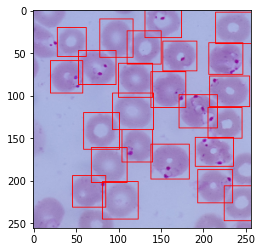

In [71]:
img = cv2.imread(imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]], cv2.IMREAD_COLOR)
list_bbxs = dict_bbxs[imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]]
img_with_box = bbv.draw_multiple_rectangles(img, [box.tolist()[:4] for box in list_bbxs], bbox_color = (255, 0, 0), thickness=1)
plt.imshow(img_with_box)

In [84]:
with open('../data/pickled/imgs_name.pkl', 'wb') as handle:
    pickle.dump(imgs_name, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/true_boxes.pkl', 'wb') as handle:
    pickle.dump(true_boxes, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/dict_bbxs.pkl', 'wb') as handle:
    pickle.dump(dict_bbxs, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/df.pkl', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)    

## Polygon to rectangle

In [73]:
filename =  'IMG_20150621_112043'
df_file = df[df['filename'] == filename]
df_file['position'].iloc[-1]

[(4166, 1704),
 (4176, 1688),
 (4184, 1664),
 (4195, 1647),
 (4230, 1633),
 (4272, 1631),
 (4309, 1644),
 (4342, 1679),
 (4341, 1709),
 (4326, 1733),
 (4299, 1758),
 (4265, 1758),
 (4233, 1750),
 (4204, 1735),
 (4174, 1718),
 (4162, 1714)]

In [74]:
rect = df_file['bbx']

In [75]:
df_file['bbx'].tolist()

[[3575, 1304, 3727, 1432],
 [1441, 1202, 1568, 1307],
 [2856, 1398, 2960, 1541],
 [2982, 1460, 3091, 1578],
 [3043, 1651, 3169, 1788],
 [2170, 1937, 2341, 2050],
 [2073, 1836, 2218, 1965],
 [1900, 1873, 2026, 1978],
 [1942, 2102, 2059, 2227],
 [1662, 1906, 1798, 2017],
 [1555, 1781, 1680, 1936],
 [1836, 1731, 2003, 1868],
 [2180, 1712, 2317, 1838],
 [2037, 1745, 2183, 1828],
 [1972, 1613, 2122, 1762],
 [1758, 1743, 1863, 1879],
 [1631, 2139, 1762, 2279],
 [1676, 2264, 1812, 2381],
 [2105, 2169, 2248, 2266],
 [2171, 2075, 2309, 2190],
 [2314, 1846, 2472, 1983],
 [2492, 1789, 2629, 1917],
 [2443, 1567, 2564, 1682],
 [2269, 1504, 2403, 1653],
 [2104, 1636, 2228, 1738],
 [2105, 1531, 2260, 1640],
 [2005, 1454, 2120, 1564],
 [1878, 1525, 2013, 1638],
 [1779, 1612, 1903, 1723],
 [1626, 1601, 1764, 1747],
 [1681, 1476, 1829, 1601],
 [1690, 1362, 1828, 1490],
 [1783, 1320, 1913, 1467],
 [1839, 1280, 1987, 1420],
 [1965, 1267, 2104, 1410],
 [2130, 1385, 2286, 1518],
 [2259, 1309, 2388, 1429],
 

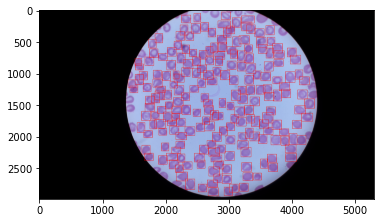

In [76]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
img_with_box = bbv.draw_multiple_rectangles(img, df_file['bbx'].tolist(), bbox_color = (255, 0, 0), thickness=3)
plt.imshow(img_with_box)

# Convert to YOLO format

In [85]:
with open('../data/pickled/imgs_name.pkl', 'rb') as handle:
    imgs_name = pickle.load(handle)
with open('../data/pickled/true_boxes.pkl', 'rb') as handle:
    true_boxes = pickle.load(handle)
with open('../data/pickled/dict_bbxs.pkl', 'rb') as handle:
    dict_bbxs = pickle.load(handle)
with open('../data/pickled/df.pkl', 'rb') as handle:
    df = pickle.load(handle)    

In [112]:
fake_patient_id = {}
counter = 200
def get_patient_id_path(path):
    '''function takes path to get patient ID,
    when patient ID is not available from path, take fake patient ID'''
    global counter
    try:
        return int(re.search('P[0-9][0-9]*', path).group(0)[1:])
    except Exception as e:
        path_patient_folder = re.search('.*/Img/', path).group(0)
        #print(path_patient_folder)
        try:
            return fake_patient_id[path_patient_folder]
        except:
            fake_patient_id[path_patient_folder] = counter
            counter += 1
            return counter
        

In [113]:
df['patient_n_path'] = df['img_path'].apply(lambda row: get_patient_id_path(row))

In [111]:
df[df['annotation_type'] == 'Polygon']['patient_n_path'].unique()

array([ 40,  13,  89, 200, 201,  47, 148,  16,  87, 202, 121,  50, 138,
        60, 203,   3,  10, 204, 205,  83, 206,  95,  29,  76,  28, 207,
       208,   8,  31,  55,  18,  32, 130])

In [117]:
len(df[df['annotation_type'] == 'Polygon']['patient_n_path'].unique())

34

In [ ]:
            polygons_line = ''
            for object in objects:
                c = cls_chck(object['label'])
                # will fire only if label is not valid one
                if c is None:
                    continue
                polygon = object['polygon']
                min_x = sys.maxsize
                max_x = 0
                min_y = sys.maxsize
                max_y = 0
                polygon_line = ''
                for x, y in polygon:
                    if x > max_x: max_x = x
                    if y > max_y: max_y = y
                    if x < min_x: min_x = x
                    if y < min_y: min_y = y
                    polygon_line += ',{},{}'.format(x, y)
                if max_x - min_x <= 1.0 or max_y - min_y <= 1.0:
                    skipped += 1
                    continue
                polygons_line += ' {},{},{},{},{}'.format(min_x, min_y, max_x, max_y, c) + polygon_line
            if polygons_line == '': continue


In [89]:
df

Patient no - Cell no        cell     comment annotation_type  \
0                       3-1  Uninfected  No_comment         Polygon   
1                       3-2  Uninfected  No_comment         Polygon   
2                       3-3  Uninfected  No_comment         Polygon   
3                       3-4  Uninfected  No_comment         Polygon   
4                       3-5  Uninfected  No_comment         Polygon   
...                     ...         ...         ...             ...   
196929                5-200  Uninfected  No_Comment           Point   
196930                5-201  Uninfected  No_Comment           Point   
196931                5-202  Uninfected  No_Comment           Point   
196932                5-203  Uninfected  No_Comment           Point   
196933                5-204  Uninfected  No_Comment           Point   

       Number of points                                           position  \
0                    14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                    15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                    14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                    14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                    14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
...                 ...                                                ...   
196929                1                                      [(2080, 643)]   
196930                1                                      [(1790, 606)]   
196931                1                                      [(1757, 756)]   
196932                1                                      [(1860, 856)]   
196933                1                                      [(1623, 683)]   

                   filename  \
0       IMG_20150817_103139   
1       IMG_20150817_103139   
2       IMG_20150817_103139   
3       IMG_20150817_103139   
4       IMG_20150817_103139   
...                     ...   
196929  IMG_20151115_181859   
196930  IMG_20151115_181859   
196931  IMG_20151115_181859   
196932  IMG_20151115_181859   
196933  IMG_20151115_181859   

                                                 txt_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                           bbx                                   mask_path  \
0        [2905, 33, 3033, 131]  ../data/masks/mask_IMG_20150817_103139.png   
1       [2951, 141, 3071, 272]  ../data/masks/mask_IMG_20150817_103139.png   
2       [2658, 135, 2801, 276]  ../data/masks/mask_IMG_20150817_103139.png   
3       [2332, 137, 2454, 265]  ../data/masks/mask_IMG_20150817_10

In [ ]:
# ## produce textfiles for all elements in the train and validation dataset
# previous_row = '1'
# for index, row in df.iterrows():
#     if row is not previous_row:
#         file = open(output_labels_train + row['filename'] + ".txt","w+")
#         for index, row_subset in train[train['filename'] == row['filename']].iterrows(): 
#             file.write(str(row_subset['class']) + ' ' + 
#                        str(row_subset['x']) + ' ' + 
#                        str(row_subset['y']) + ' ' + 
#                        str(row_subset['width']) + ' ' + 
#                        str(row_subset['height']) + ' ')
#             file.write('\n')
#         for index, row_subset in val[val['filename'] == row['filename']].iterrows(): 
#             file.write(str(row_subset['class']) + ' ' + 
#                        str(row_subset['x']) + ' ' + 
#                        str(row_subset['y']) + ' ' + 
#                        str(row_subset['width']) + ' ' + 
#                        str(row_subset['height']) + ' ')
#             file.write('\n')
#         file.close()
#         previous_row = row
#     else:
#         pass